# Using Machine Learning Tools 2020
# Assignment 3: Deep Neural Networks

## Overview

In this assignment you will implement two types of deep learning network (fully connected and convolutional neural networks) to classify images of hands in poses corresponding to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train two different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore different cases of over-fitting and under-fitting, and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing optimised deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, and optimize performance. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General Instructions 

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, as indicated in this template.
 - Your code must use the current stable versions of python libraries, not outdated versions.
 - All data processing must be done within the notebook after loading the data.
 - Comment your code, so that its purpose is clear to the reader.
 - **Before submitting your notebook, make sure to run all cells in your final notebook so that it works correctly.**

This assignment is divided into several tasks. Stick to this notebook format, although feel free to add cells throughout, but keep the same numbering for all instructions, questions and answers.

Make sure to answer every question with *separate answer text (“Answer: ...”) in a cell* and check that you answered all sub-questions/aspects within the question. The text answers are worth points.

Make the *figures self-explanatory and unambiguous*. Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

## Outline

The main steps in the assignment are outlined here, so that you can appreciate the bigger picture. Some of the steps are purely for testing your knowledge and demonstrating certain things, but in general it outlines the main process that you would go through to solve a practical problem.

- To start with we load the data, visualise and explore it. You should always do this in any problem.

- After this we will establish how long a simple network takes to run on a given amount of training data on your computer. This is important for this assignment as you have to run on your own machines, and we need to make sure it runs in a reasonable amount of time. In a practical problem you are likely to have a lot more data and will use bigger networks, but it is common that you will have a limit on the available resources and time, so establishing a baseline timing and deciding on constraints is a very common task in any problem.

- Following this we will go through a few specific cases, looking at some extremes and learning to identify common problems, how to spot them and options for how to correct for them.

- Afterwards, the main bulk of the assignment will focus on tuning the networks to give the best performance. This is something you will need to do systematically, and demonstrates the approach that you would take in any practical problem. Some limitations will be given, in order to help you in this assignment, but it should be clear how to extrapolate these to a more general setting for other datasets and tasks.

- Once the optimal network is found, the performance will be evaluated.

- A free choice element at the end will allow you to explore one extra aspect, beyond the limitations imposed above.


Feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

## Your Details

#### Write your name and ID here
Moaz Mohamed

## Initialise environment

In [1]:

# Common imports
import numpy as np
import os, time
import pandas as pd

# # Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

---

## 1. Explore the Dataset (10%)

### 1.1 Load the data
 - We will use an MNIST-style dataset of sign language signals (hands), which are all small images (28x28)
 - Files are sign_mnist_train.csv and sign_mnist_test.csv
 - Split up labels and images
 - Reshape images appropriately

In [2]:
# code here
data_train = pd.read_csv("f_train.csv")
data_test = pd.read_csv("f_test.csv")

### 1.2 Look at the data
- Print out some descriptive information about the dataset
- Show one example image of each class

In [3]:
# code here
data_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
data_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
num2alpha={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',
           17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}
y_train = data_train['label']
X_train = data_train.drop(columns=['label'])

y_train1 = y_train.to_numpy()
X_train1 = X_train.to_numpy()

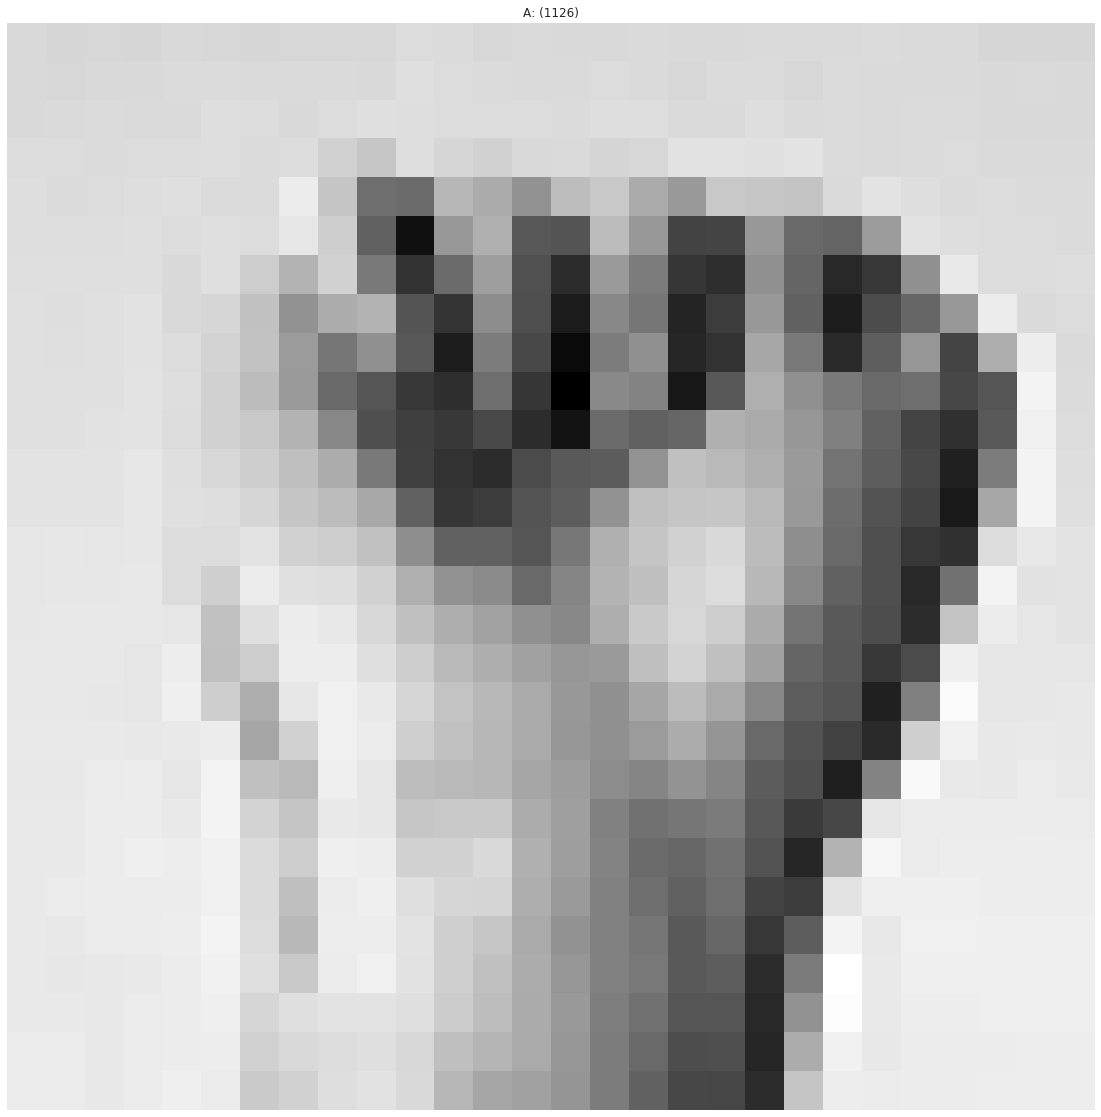

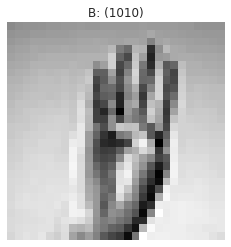

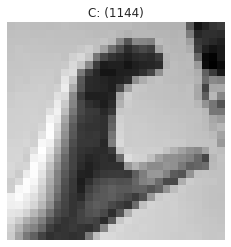

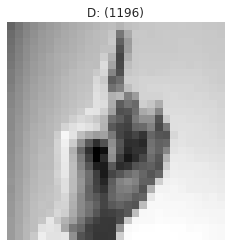

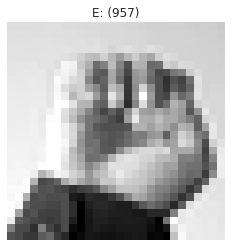

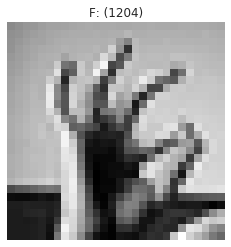

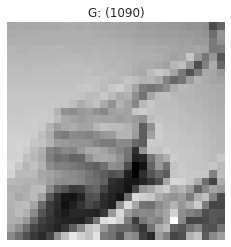

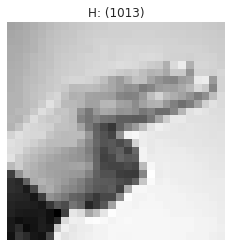

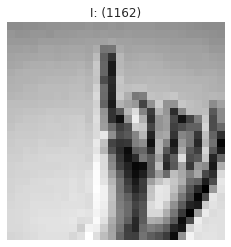

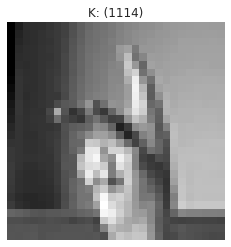

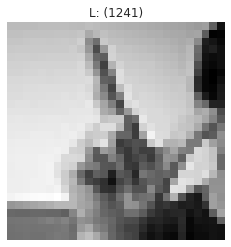

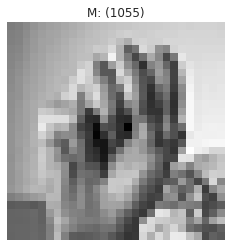

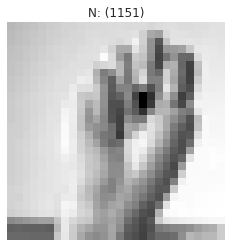

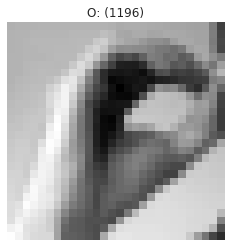

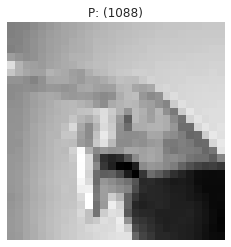

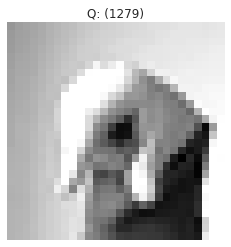

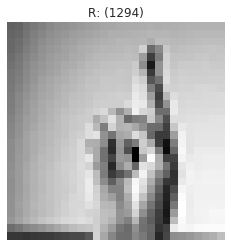

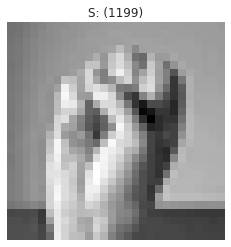

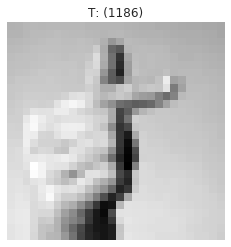

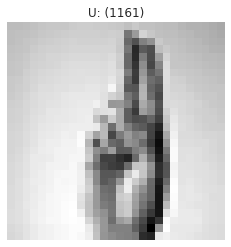

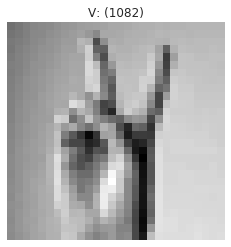

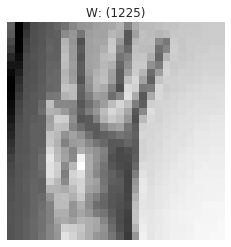

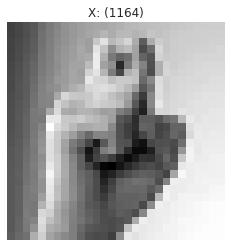

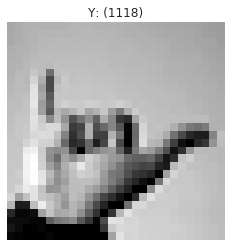

In [6]:
unique_labels = set(y_train)
plt.figure(figsize=(20,20))

i = 1 
for label in unique_labels:
    image = X_train1[y_train1.tolist().index(label)]
    #plt.subplot(5,5,i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(num2alpha[label], y_train1.tolist().count(label)))
    i += 1
    image = image.reshape((28,28))
    _ = plt.imshow(image, cmap='gray')
    plt.show()

### Question 1.3
- Which pair of classes do you think will be the most difficult to distinguish?  Give a reason for your answer.

In [7]:
# Answer question 1.1 here (no code required)

### 1.4 Look at the labels
- Look at the distribution of the labels
- Adjust for anything that could cause problems later on

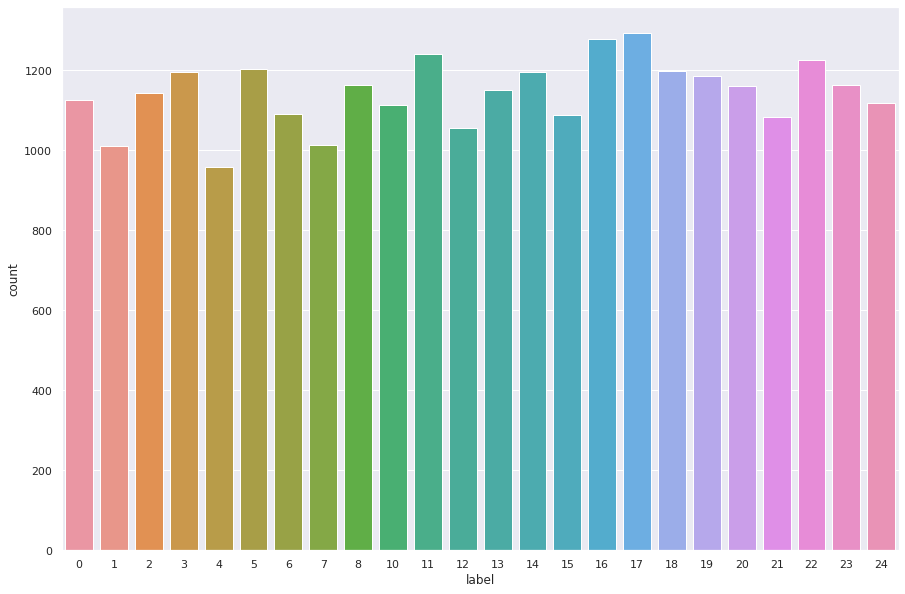

In [8]:
# code here
plt.figure(figsize=(15,10))
sns.countplot(data_train['label'])

### 1.5 Split the data (test, validation and training) and scale it
- We will only take the first 2500 training images (which is still over 100 per class) in order to keep run-times down and to make training more challenging. In a practical situation you might either have less data than you'd like or limitations on how much can be processed, so this also reflects a common real-life constraint.
- In this case we will create both the validation and test sets from the testing dataset.  It is unusual to do this, but in this case the training set contains a lot of non-independent, augmented images and it is important that the validation images must be independent. 
- Take 1000 images each for the validation and test sets.
- Scale the data appropriately (e.g. as done for other MNIST datasets).

In [230]:
# code here
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()



data_train_lw  = data_train.iloc[0:2500] 
X_train = data_train_lw.drop(columns = ['label'])
y_train = data_train_lw['label']


y_train_1 = label_binrizer.fit_transform(y_train)

X_train_np_cc = ((X_train.copy().to_numpy())/255.0).reshape((-1, 28, 28, 1))
X_train_np_nn = ((X_train.copy().to_numpy())/255.0).reshape((-1, 28, 28))

y_train_np = ((y_train_1))

test_set = data_test[0:1000]

X_test = test_set.drop(columns=["label"])
y_test = test_set['label']

y_test = label_binrizer.fit_transform(y_test)


X_test_np_cc = ((X_test.copy().to_numpy())/255.0).reshape((-1, 28, 28, 1))
X_test_np_nn = ((X_test.copy().to_numpy())/255.0).reshape((-1, 28, 28))
y_test_np = y_test


validation_set = data_test[2000:3000]

X_valid = validation_set.drop(columns=['label'])
y_valid = validation_set['label']


y_valid = label_binrizer.fit_transform(y_valid)


X_valid_np_cc = ((X_valid.copy().to_numpy())/255.0).reshape((-1, 28, 28, 1))
X_valid_np_nn = ((X_valid.copy().to_numpy())/255.0).reshape((-1, 28, 28))

y_valid_np = y_valid

In [50]:
#len(y_test)
y_train_np.shape

(2500, 24)

In [11]:
data_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


### 1.6 Look at label distribution
- Check the label distribution in all three sets and if there are problems, change the selection above.

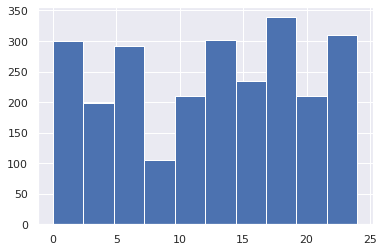

In [12]:
# code here
plt.hist(y_train)
plt.show()

***

## 2. Initial Deep Learning Networks (30%)

In this section you will look at a variety of networks with this data and explore various settings and outcomes.

### Question 2.1
 - We will treat this as a classification problem but we could formulate it as a regression problem instead (predicting the label values as the outcomes). Name one disadvantage that a regression approach would have.

In [13]:
# Answer question 2.1 here (no code required)

### Question 2.2
 - What is chance level accuracy (e.g. if predictions were completely random) in this case?

In [14]:
# Answer question 2.2 here (no code required)

### 2.3 Timing Test
 - We will start to work out how long it takes to train a moderately sized network on your machine
 - Build a convolutional neural network (CNN) with the following specifications:
   - All filter (kernel) sizes are 3x3
   - Initial Conv2D layer with 64 filters
   - MaxPooling layer following this
   - Second Conv2D layer with 128 filters
   - Dense output layer after this
 - Set the number of epochs to **20** this time (we will use early stopping methods later but **not** now)
 - Set the batch size to 50
 - Use the *Adam* optimiser, with its default learning rate (we will use the Adam optimiser throughout this assignment)
 - Use the *ELU* activation function for the hidden layers (this will be used throughout)
 - Training/Validation/Testing set sizes are 2500/1000/1000, as described above
 - Use time.time() to determine how long it takes to train your network
 - Plot your learning curves (loss functions and accuracies for training and validation)
 - Calculate the accuracies of the network on both the validation and test datasets
 
If this run takes less than 10 minutes then continue with these settings. If it takes much longer than 10 minutes then reduce the number of training points until it is close to 10 minutes. In the case that you cannot achieve this without reducing the number of training points to less than 250, please contact a course organiser, as you may need to use alternative computational resources.

In [45]:
y_train_np.shape

(2500, 24)

In [62]:
# Some key parameters
n_train = 2500
n_valid = 1000
# Define the number and size of hidden layers
#hiddensizes = [16, 32, 16]
# Define the activation function to be used by hidden layers
#actfn = "relu"
actfn = "elu"
# Optimiser and learning rate
optimizer = keras.optimizers.Adam
learningrate = 0.0001   # SGD default value
# Set size of batch and number of epochs
batch_size = 50
n_epochs = 20
np.random.seed(42)
tf.random.set_seed(42)

In [272]:
# code here
#  Note that you can reuse code from workshops 8, 9 or 10 here
#  but make sure to modify it to use the appropriate optimiser and activation function

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]),kernel_initializer="he_uniform") 
model.add(keras.layers.MaxPooling2D(pool_size=2)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation=actfn)) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(24, activation = "softmax"))
model.compile(loss="categorical_crossentropy", optimizer=optimizer(lr=learningrate), metrics=["accuracy"])

TypeError: add() got an unexpected keyword argument 'kernel_initializer'

In [70]:
#%timeit history = model.fit(X_train_np, y_train_np, epochs=n_epochs,validation_data=(X_valid_np, y_valid_np))
# 3.52 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Epoch 1/20
79/79 [==============================] - 0s 2ms/step - loss: 2.3158e-04 - accuracy: 1.0000 - val_loss: 1.2142 - val_accuracy: 0.8230
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 2.2686e-04 - accuracy: 1.0000 - val_loss: 1.2173 - val_accuracy: 0.8230
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 2.2143e-04 - accuracy: 1.0000 - val_loss: 1.2165 - val_accuracy: 0.8190
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 2.1967e-04 - accuracy: 1.0000 - val_loss: 1.2164 - val_accuracy: 0.8180
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 2.0890e-04 - accuracy: 1.0000 - val_loss: 1.2219 - val_accuracy: 0.8160
Epoch 6/20
79/79 [==============================] - 0s 2ms/step - loss: 2.0921e-04 - accuracy: 1.0000 - val_loss: 1.2196 - val_accuracy: 0.8180
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 2.0564e-04 - accuracy: 1.0000 - val_loss: 1.2219 - val_accuracy:

Epoch 18/20
79/79 [==============================] - 0s 2ms/step - loss: 2.0900e-04 - accuracy: 1.0000 - val_loss: 1.3265 - val_accuracy: 0.8170
Epoch 19/20
79/79 [==============================] - 0s 2ms/step - loss: 2.0403e-04 - accuracy: 1.0000 - val_loss: 1.3246 - val_accuracy: 0.8150
Epoch 20/20
79/79 [==============================] - 0s 2ms/step - loss: 1.9863e-04 - accuracy: 1.0000 - val_loss: 1.3266 - val_accuracy: 0.8160
Epoch 1/20
79/79 [==============================] - 0s 2ms/step - loss: 1.9254e-04 - accuracy: 1.0000 - val_loss: 1.3269 - val_accuracy: 0.8150
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 1.9042e-04 - accuracy: 1.0000 - val_loss: 1.3264 - val_accuracy: 0.8150
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 1.8357e-04 - accuracy: 1.0000 - val_loss: 1.3277 - val_accuracy: 0.8160
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 1.7995e-04 - accuracy: 1.0000 - val_loss: 1.3253 - val_accura

Epoch 15/20
79/79 [==============================] - 0s 2ms/step - loss: 5.8621e-05 - accuracy: 1.0000 - val_loss: 1.4007 - val_accuracy: 0.8180
Epoch 16/20
79/79 [==============================] - 0s 2ms/step - loss: 5.7872e-05 - accuracy: 1.0000 - val_loss: 1.4016 - val_accuracy: 0.8210
Epoch 17/20
79/79 [==============================] - 0s 2ms/step - loss: 5.6033e-05 - accuracy: 1.0000 - val_loss: 1.4012 - val_accuracy: 0.8190
Epoch 18/20
79/79 [==============================] - 0s 2ms/step - loss: 5.4635e-05 - accuracy: 1.0000 - val_loss: 1.3985 - val_accuracy: 0.8210
Epoch 19/20
79/79 [==============================] - 0s 2ms/step - loss: 5.4425e-05 - accuracy: 1.0000 - val_loss: 1.4032 - val_accuracy: 0.8210
Epoch 20/20
79/79 [==============================] - 0s 2ms/step - loss: 5.2414e-05 - accuracy: 1.0000 - val_loss: 1.4106 - val_accuracy: 0.8210
Epoch 1/20
79/79 [==============================] - 0s 2ms/step - loss: 5.0966e-05 - accuracy: 1.0000 - val_loss: 1.4144 - val_acc

In [76]:
history = model.fit(X_train_np, y_train_np, epochs=n_epochs,
                    validation_data=(X_valid_np, y_valid_np))

Epoch 1/20
79/79 [==============================] - 0s 3ms/step - loss: 3.0732 - accuracy: 0.1404 - val_loss: 2.9126 - val_accuracy: 0.2300
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 2.5074 - accuracy: 0.3564 - val_loss: 2.1635 - val_accuracy: 0.4010
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 1.7048 - accuracy: 0.5524 - val_loss: 1.6077 - val_accuracy: 0.5270
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 1.2701 - accuracy: 0.6516 - val_loss: 1.3065 - val_accuracy: 0.5900
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 1.0088 - accuracy: 0.7268 - val_loss: 1.1594 - val_accuracy: 0.6350
Epoch 6/20
79/79 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.7672 - val_loss: 1.0319 - val_accuracy: 0.6960
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.8108 - val_loss: 0.9876 - val_accuracy: 0.6810
Epoch 8/20
79/79 [==

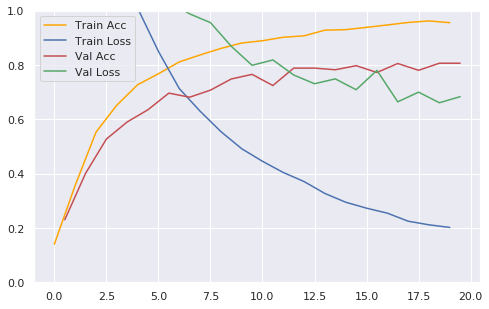

In [77]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,n_epochs),history.history['accuracy'], color='orange')
plt.plot(np.arange(0,n_epochs),history.history['loss'],'b')
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_loss'],'g')
plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show() 

### 2.4 Initial Network Exploration
- We will now look at a couple of imperfect cases to get a feeling for what happens in different training situations

### Question 2.5
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

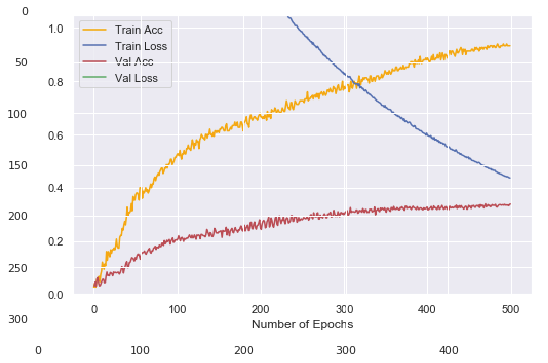

In [57]:
im = plt.imread('LearningPlot1.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

In [ ]:
# Answer question 2.5 here (no code required)

### Question 2.6
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

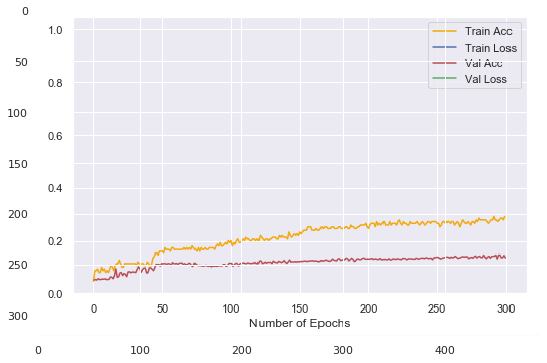

In [66]:
im = plt.imread('LearningPlot2.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

In [ ]:
# Answer question 2.6 here (no code required)

### Question 2.7
 - Name something that you could do to alleviate problems due to (a) overfitting and (b) underfitting. Provide separate answers for (a) and (b).

In [ ]:
# Answer question 2.7 here (no code required)

***

## 3. Main Network Optimisation (50%)

In this section you will undertake the main task of going through the process to find a deep learning solution to this problem that is (within limits) optimised to this specific case.

The following settings for the networks will be fixed:
 - Batch size of 50
 - Maximum number of epochs of 100, but implement *early stopping*
 - Use the *Adam* optimiser
 - Use the *ELU* activation function for all hidden layers (although ReLU is very common, we will explore ELU for this assignment)
 - Use the He Uniform initialization for weights (pass *kernel_initializer="he_uniform"* into the layer specifications)
 - Training/Validation/Testing set sizes are 2500/1000/1000 as described above (with the validation set derived from the original test dataset) unless you needed to reduce the training set size based on your timing tests

You will investigate **both** fully connected and CNN architectures, with the following possibilities:
 - **Number of hidden or Conv2D layers** can be **1, 2 or 3**, but no more (this does *not* count the final dense layer in a CNN)
 - **Number of hidden nodes** (fully connected network) or **number of filters** (in a Conv2D layer of a CNN) can be: **32, 64, 128 or 256** (no other values can be used)
 - A constant **learning rate** should be used (no varying schedules) where the value can be adjusted to be **0.1, 1.0, 10.0 and 100.0** **times the default rate** (these are the only values you can use)
 - CNN architectures will always follow the pattern of Conv2D followed immediately by MaxPooling, with the dense layer following the final Conv2D: e.g. C2-D or C2-MP-C2-D or C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense) - note that this is the same pattern used in the code from workshops 8, 9 and 10

Note that the patience setting in the early stopping can be adjusted, but is not considered a "parameter" as such.

A fixed training/validation/test split will be used throughout.

The objective is for you to go through a systematic process for finding a good network that could be adapted to work for other problems. It is the process, rather than the final results, that are more important here (it is not a competition based on results, but an exercise in learning how to approach such problems in a good way). So clearly explain your process, document your code and show appropriate results as you go. In particular, make a summary at the end, in a separate cell, of all the learning rate curves and any other key pieces of information that you used for comparing models and parameter settings.

Remember that the following exploration options exist:
 - Random search through parameter space (noting that here most of the "parameters" are ones that specify the network architecture)
 - Grid search
 - Individual parameter sweeps (varying only one parameter whilst keeping others fixed)
 - These can also be combined together and/or iterated
 
Before writing any code, answer the following two questions and, after that, design and implement your optimisation process to select the "best" network.

### Question 3.1
- What approach will you take to this optimisation?  Summarise your main strategy (or strategies) in a few lines here, pointing out any major advantages or disadvantages.

In [ ]:
# Answer question 3.1 here (no code required)

### Question 3.2
 - When comparing models (either completely different networks or just two networks with different options/parameter settings), what is the best metric to use: accuracy or loss? And should it be calculated on the training set, validation set or test set?  Give reasons for your answer.

In [ ]:
# Answer question 3.2 here (no code required)

### 3.3 Now write the code for this section, and below that, in a separate cell, summarise your results.

In [290]:
# Some key parameters
n_train = 2500
n_valid = 1000
# Define the number and size of hidden layers
#hiddensizes = [16, 32, 16]
# Define the activation function to be used by hidden layers
#actfn = "relu"
actfn = "elu"
# Optimiser and learning rate
optimizer = keras.optimizers.Adam
learningrate = 0.0001   # SGD default value
# Set size of batch and number of epochs
batch_size = 50
n_epochs = 60
np.random.seed(42)
tf.random.set_seed(42)

In [239]:
#from tf.keras.wrappers.scikit_learn import KerasClassifier
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
# Main section 3 code here

# model = keras.models.Sequential()   # This is a style of building networks - the easiest option
# model.add(keras.layers.Flatten(input_shape = [28 , 28]))   # our inputs are 28 x 28 arrays, so need to become 1D
# model.add(keras.layers.Dense(256, activation = actfn,kernel_initializer="he_uniform"))    # first hidden layer
# model.add(keras.layers.Dense(256, activation = actfn))    # second hidden layer
# model.add(keras.layers.Dense(256, activation = actfn))    # second hidden layer
# model.add(keras.layers.Dense(24, activation = "softmax"))  # output layer
# model.compile(loss="categorical_crossentropy", optimizer=optimizer(lr=learningrate), metrics=["accuracy"])



def build_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()   # This is a style of building networks - the easiest option
    model.add(keras.layers.Flatten(input_shape = [28 , 28]))   # our inputs are 28 x 28 arrays, so need to become 1D
#     model.add(keras.layers.Dense(hp.Choice('units', [32, 64, 128 , 256 ])
#                                  , activation = "elu",kernel_initializer="he_uniform"))    # first hidden layer
#     model.add(keras.layers.Dense(hp.Choice('units1', [32, 64, 128 , 256 ])
#                                  , activation = "elu"))    # second hidden layer
#     model.add(keras.layers.Dense(hp.Choice('units2', [32, 64, 128 , 256 ]),
#                                  activation = "elu"))    # second hidden layer
    model.add(keras.layers.Dense(hp.Choice('units', [32, 64, 128 , 256 ])
                                  , activation = "elu",kernel_initializer="he_uniform")) 
    for i in range(hp.Int('num_layers', 1, 2)):
        model.add(keras.layers.Dense(hp.Choice('units_' + str(i),
                                            [32, 64, 128 , 256] ),
                               activation='elu'))
    
    model.add(keras.layers.Dense(24, activation = "softmax"))  # output layer
    model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), metrics=["accuracy"])
    
    return model

In [246]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=3,
    directory='my_dir',
    project_name='nn2')


tuner.search_space_summary()

In [247]:
tuner.search(X_train_np_nn, y_train_np,
             epochs=60,
             validation_data=(X_valid_np_nn, y_valid_np)
             ,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.6015 - accuracy: 0.06 - ETA: 0s - loss: 3.2284 - accuracy: 0.05 - 0s 2ms/step - loss: 3.1612 - accuracy: 0.0784 - val_loss: 3.0436 - val_accuracy: 0.1110
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 3.0009 - accuracy: 0.09 - ETA: 0s - loss: 2.9438 - accuracy: 0.13 - 0s 2ms/step - loss: 2.8978 - accuracy: 0.1620 - val_loss: 2.8447 - val_accuracy: 0.2190
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.7308 - accuracy: 0.28 - ETA: 0s - loss: 2.7223 - accuracy: 0.24 - 0s 2ms/step - loss: 2.6815 - accuracy: 0.2568 - val_loss: 2.6596 - val_accuracy: 0.2490
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.5668 - accuracy: 0.21 - ETA: 0s - loss: 2.5472 - accuracy: 0.30 - 0s 2ms/step - loss: 2.5016 - accuracy: 0.3192 - val_loss: 2.4843 - val_accuracy: 0.3310
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.4075 - accuracy: 0.40 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 0.7953 - accuracy: 0.75 - ETA: 0s - loss: 0.8658 - accuracy: 0.77 - 0s 2ms/step - loss: 0.8580 - accuracy: 0.7804 - val_loss: 1.2786 - val_accuracy: 0.5970
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 1.1681 - accuracy: 0.65 - ETA: 0s - loss: 0.8482 - accuracy: 0.76 - 0s 2ms/step - loss: 0.8471 - accuracy: 0.7744 - val_loss: 1.2164 - val_accuracy: 0.6310
Epoch 39/60
79/79 [==============================] - ETA: 0s - loss: 0.9985 - accuracy: 0.71 - ETA: 0s - loss: 0.8176 - accuracy: 0.78 - 0s 2ms/step - loss: 0.8259 - accuracy: 0.7812 - val_loss: 1.2653 - val_accuracy: 0.6000
Epoch 40/60
79/79 [==============================] - ETA: 0s - loss: 0.8826 - accuracy: 0.81 - ETA: 0s - loss: 0.8529 - accuracy: 0.76 - 0s 2ms/step - loss: 0.8240 - accuracy: 0.7804 - val_loss: 1.2056 - val_accuracy: 0.6410
Epoch 41/60
79/79 [==============================] - ETA: 0s - loss: 0.5727 - accuracy: 0.81 - ETA: 0s - loss: 0

79/79 [==============================] - ETA: 0s - loss: 1.6606 - accuracy: 0.50 - ETA: 0s - loss: 1.5836 - accuracy: 0.55 - 0s 2ms/step - loss: 1.5938 - accuracy: 0.5548 - val_loss: 1.7506 - val_accuracy: 0.5080
Epoch 14/60
79/79 [==============================] - ETA: 0s - loss: 1.6910 - accuracy: 0.56 - ETA: 0s - loss: 1.5505 - accuracy: 0.56 - 0s 2ms/step - loss: 1.5319 - accuracy: 0.5784 - val_loss: 1.7122 - val_accuracy: 0.5230
Epoch 15/60
79/79 [==============================] - ETA: 0s - loss: 1.5605 - accuracy: 0.62 - ETA: 0s - loss: 1.5169 - accuracy: 0.58 - 0s 2ms/step - loss: 1.4816 - accuracy: 0.5984 - val_loss: 1.7020 - val_accuracy: 0.5030
Epoch 16/60
79/79 [==============================] - ETA: 0s - loss: 1.4870 - accuracy: 0.62 - ETA: 0s - loss: 1.4604 - accuracy: 0.59 - 0s 2ms/step - loss: 1.4415 - accuracy: 0.6044 - val_loss: 1.6503 - val_accuracy: 0.5220
Epoch 17/60
79/79 [==============================] - ETA: 0s - loss: 1.2671 - accuracy: 0.62 - ETA: 0s - loss: 1

79/79 [==============================] - ETA: 0s - loss: 0.9860 - accuracy: 0.71 - ETA: 0s - loss: 1.0744 - accuracy: 0.72 - 0s 2ms/step - loss: 1.0693 - accuracy: 0.7328 - val_loss: 1.4082 - val_accuracy: 0.5800
Epoch 28/60
79/79 [==============================] - ETA: 0s - loss: 0.9548 - accuracy: 0.71 - ETA: 0s - loss: 1.0205 - accuracy: 0.73 - 0s 2ms/step - loss: 1.0414 - accuracy: 0.7316 - val_loss: 1.3988 - val_accuracy: 0.5750
Epoch 29/60
79/79 [==============================] - ETA: 0s - loss: 0.6749 - accuracy: 0.87 - ETA: 0s - loss: 1.0406 - accuracy: 0.72 - 0s 2ms/step - loss: 1.0437 - accuracy: 0.7260 - val_loss: 1.3914 - val_accuracy: 0.5660
Epoch 30/60
79/79 [==============================] - ETA: 0s - loss: 1.1096 - accuracy: 0.68 - ETA: 0s - loss: 0.9963 - accuracy: 0.74 - 0s 2ms/step - loss: 1.0021 - accuracy: 0.7488 - val_loss: 1.4066 - val_accuracy: 0.5720
Epoch 31/60
79/79 [==============================] - ETA: 0s - loss: 1.0048 - accuracy: 0.75 - ETA: 0s - loss: 0

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 4.0248 - accuracy: 0.03 - ETA: 0s - loss: 3.2523 - accuracy: 0.05 - 0s 2ms/step - loss: 3.1906 - accuracy: 0.0688 - val_loss: 3.0334 - val_accuracy: 0.1000
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.9804 - accuracy: 0.12 - ETA: 0s - loss: 2.9637 - accuracy: 0.14 - 0s 2ms/step - loss: 2.9279 - accuracy: 0.1576 - val_loss: 2.8433 - val_accuracy: 0.1960
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.7189 - accuracy: 0.34 - ETA: 0s - loss: 2.7278 - accuracy: 0.26 - 0s 2ms/step - loss: 2.6925 - accuracy: 0.2640 - val_loss: 2.6668 - val_accuracy: 0.2100
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.5320 - accuracy: 0.28 - ETA: 0s - loss: 2.5178 - accuracy: 0.30 - 0s 2ms/step - loss: 2.4740 - accuracy: 0.3252 - val_loss: 2.4477 - val_accuracy: 0.3660
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.2979 - accuracy: 0.37 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 0.6691 - accuracy: 0.81 - ETA: 0s - loss: 0.7546 - accuracy: 0.79 - 0s 2ms/step - loss: 0.7450 - accuracy: 0.8036 - val_loss: 1.1694 - val_accuracy: 0.6490
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 1.1501 - accuracy: 0.68 - ETA: 0s - loss: 0.7280 - accuracy: 0.80 - 0s 3ms/step - loss: 0.7322 - accuracy: 0.8048 - val_loss: 1.1333 - val_accuracy: 0.6850
Epoch 39/60
79/79 [==============================] - ETA: 0s - loss: 0.8656 - accuracy: 0.84 - ETA: 0s - loss: 0.7077 - accuracy: 0.82 - 0s 2ms/step - loss: 0.7142 - accuracy: 0.8180 - val_loss: 1.2150 - val_accuracy: 0.6440
Epoch 40/60
79/79 [==============================] - ETA: 0s - loss: 0.7990 - accuracy: 0.78 - ETA: 0s - loss: 0.7509 - accuracy: 0.79 - 0s 2ms/step - loss: 0.7120 - accuracy: 0.8116 - val_loss: 1.1127 - val_accuracy: 0.6880
Epoch 41/60
79/79 [==============================] - ETA: 0s - loss: 0.4200 - accuracy: 0.93 - ETA: 0s - loss: 0

79/79 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.90 - ETA: 0s - loss: 0.9107 - accuracy: 0.74 - 0s 1ms/step - loss: 0.9097 - accuracy: 0.7568 - val_loss: 1.3109 - val_accuracy: 0.5870
Epoch 30/60
79/79 [==============================] - ETA: 0s - loss: 1.0117 - accuracy: 0.68 - ETA: 0s - loss: 0.8746 - accuracy: 0.76 - 0s 2ms/step - loss: 0.8771 - accuracy: 0.7720 - val_loss: 1.3136 - val_accuracy: 0.5860
Epoch 31/60
79/79 [==============================] - ETA: 0s - loss: 0.8668 - accuracy: 0.75 - ETA: 0s - loss: 0.8593 - accuracy: 0.77 - 0s 2ms/step - loss: 0.8693 - accuracy: 0.7688 - val_loss: 1.2402 - val_accuracy: 0.6310
Epoch 32/60
79/79 [==============================] - ETA: 0s - loss: 0.8783 - accuracy: 0.78 - ETA: 0s - loss: 0.8368 - accuracy: 0.77 - 0s 1ms/step - loss: 0.8453 - accuracy: 0.7776 - val_loss: 1.2191 - val_accuracy: 0.6660
Epoch 33/60
79/79 [==============================] - ETA: 0s - loss: 1.1421 - accuracy: 0.68 - ETA: 0s - loss: 0

79/79 [==============================] - ETA: 0s - loss: 1.0058 - accuracy: 0.68 - ETA: 0s - loss: 1.0651 - accuracy: 0.70 - 0s 2ms/step - loss: 1.0710 - accuracy: 0.7084 - val_loss: 1.4636 - val_accuracy: 0.5460
Epoch 23/60
79/79 [==============================] - ETA: 0s - loss: 1.0241 - accuracy: 0.68 - ETA: 0s - loss: 1.0699 - accuracy: 0.70 - 0s 2ms/step - loss: 1.0534 - accuracy: 0.7120 - val_loss: 1.4136 - val_accuracy: 0.5740
Epoch 24/60
79/79 [==============================] - ETA: 0s - loss: 0.8610 - accuracy: 0.81 - ETA: 0s - loss: 1.0242 - accuracy: 0.72 - 0s 2ms/step - loss: 1.0195 - accuracy: 0.7264 - val_loss: 1.4163 - val_accuracy: 0.5910
Epoch 25/60
79/79 [==============================] - ETA: 0s - loss: 1.1549 - accuracy: 0.65 - ETA: 0s - loss: 1.0043 - accuracy: 0.72 - 0s 2ms/step - loss: 0.9925 - accuracy: 0.7316 - val_loss: 1.4193 - val_accuracy: 0.5940
Epoch 26/60
79/79 [==============================] - ETA: 0s - loss: 1.1072 - accuracy: 0.71 - ETA: 0s - loss: 0

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3030 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.1802 - accuracy: 0.0579   - 0s 2ms/step - loss: 3.1103 - accuracy: 0.0868 - val_loss: 2.9477 - val_accuracy: 0.1340
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.9394 - accuracy: 0.12 - ETA: 0s - loss: 2.7816 - accuracy: 0.19 - 0s 2ms/step - loss: 2.7080 - accuracy: 0.2196 - val_loss: 2.5805 - val_accuracy: 0.2290
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.3767 - accuracy: 0.40 - ETA: 0s - loss: 2.3222 - accuracy: 0.32 - 0s 2ms/step - loss: 2.2469 - accuracy: 0.3428 - val_loss: 2.1567 - val_accuracy: 0.3470
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.3261 - accuracy: 0.28 - ETA: 0s - loss: 1.9721 - accuracy: 0.40 - 0s 2ms/step - loss: 1.9185 - accuracy: 0.4204 - val_loss: 1.8911 - val_accuracy: 0.4290
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 1.8678 - accuracy: 0.40 - ET

79/79 [==============================] - ETA: 0s - loss: 2.6992 - accuracy: 0.34 - ETA: 0s - loss: 2.6708 - accuracy: 0.21 - 0s 2ms/step - loss: 2.5769 - accuracy: 0.2508 - val_loss: 2.4252 - val_accuracy: 0.2710
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.1228 - accuracy: 0.50 - ETA: 0s - loss: 2.1825 - accuracy: 0.34 - 0s 2ms/step - loss: 2.1379 - accuracy: 0.3504 - val_loss: 2.0294 - val_accuracy: 0.3370
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.0313 - accuracy: 0.37 - ETA: 0s - loss: 1.8836 - accuracy: 0.41 - 0s 2ms/step - loss: 1.8424 - accuracy: 0.4308 - val_loss: 1.8578 - val_accuracy: 0.4220
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 1.6864 - accuracy: 0.43 - ETA: 0s - loss: 1.6547 - accuracy: 0.46 - 0s 2ms/step - loss: 1.6409 - accuracy: 0.4816 - val_loss: 1.7132 - val_accuracy: 0.4490
Epoch 6/60
79/79 [==============================] - ETA: 0s - loss: 1.4369 - accuracy: 0.53 - ETA: 0s - loss: 1.507

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.4414 - accuracy: 0.03 - ETA: 0s - loss: 3.4212 - accuracy: 0.03 - 0s 2ms/step - loss: 3.3488 - accuracy: 0.0376 - val_loss: 3.2237 - val_accuracy: 0.0200
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 3.1546 - accuracy: 0.09 - ETA: 0s - loss: 3.2195 - accuracy: 0.05 - 0s 2ms/step - loss: 3.2204 - accuracy: 0.0464 - val_loss: 3.2365 - val_accuracy: 0.0500
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 3.2039 - accuracy: 0.06 - ETA: 0s - loss: 3.2090 - accuracy: 0.04 - 0s 2ms/step - loss: 3.2151 - accuracy: 0.0512 - val_loss: 3.2726 - val_accuracy: 0.0200
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 3.2139 - accuracy: 0.03 - ETA: 0s - loss: 3.2293 - accuracy: 0.04 - 0s 2ms/step - loss: 3.2224 - accuracy: 0.0448 - val_loss: 3.2562 - val_accuracy: 0.0200
Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2730 - accuracy: 0.09 - ETA: 0s - 

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.5072 - accuracy: 0.03 - ETA: 0s - loss: 3.2292 - accuracy: 0.06 - 0s 2ms/step - loss: 3.1585 - accuracy: 0.0832 - val_loss: 2.9499 - val_accuracy: 0.1320
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.8551 - accuracy: 0.28 - ETA: 0s - loss: 2.7931 - accuracy: 0.17 - 0s 2ms/step - loss: 2.6988 - accuracy: 0.1992 - val_loss: 2.6669 - val_accuracy: 0.1700
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.3770 - accuracy: 0.34 - ETA: 0s - loss: 2.3476 - accuracy: 0.30 - 0s 2ms/step - loss: 2.2822 - accuracy: 0.3188 - val_loss: 2.2874 - val_accuracy: 0.2690
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.1595 - accuracy: 0.21 - ETA: 0s - loss: 2.0264 - accuracy: 0.36 - 0s 2ms/step - loss: 1.9723 - accuracy: 0.3780 - val_loss: 2.0297 - val_accuracy: 0.3850
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 1.7825 - accuracy: 0.56 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 1.5141 - accuracy: 0.62 - ETA: 0s - loss: 1.0134 - accuracy: 0.67 - 0s 2ms/step - loss: 1.0163 - accuracy: 0.6784 - val_loss: 1.6311 - val_accuracy: 0.4640
Epoch 13/60
79/79 [==============================] - ETA: 0s - loss: 1.2264 - accuracy: 0.53 - ETA: 0s - loss: 0.9351 - accuracy: 0.71 - 0s 2ms/step - loss: 0.9522 - accuracy: 0.7100 - val_loss: 1.3474 - val_accuracy: 0.5820
Epoch 14/60
79/79 [==============================] - ETA: 0s - loss: 0.8872 - accuracy: 0.65 - ETA: 0s - loss: 0.9604 - accuracy: 0.71 - 0s 2ms/step - loss: 0.9361 - accuracy: 0.7184 - val_loss: 1.3239 - val_accuracy: 0.5770
Epoch 15/60
79/79 [==============================] - ETA: 0s - loss: 0.8751 - accuracy: 0.81 - ETA: 0s - loss: 0.8738 - accuracy: 0.73 - 0s 2ms/step - loss: 0.8498 - accuracy: 0.7456 - val_loss: 1.4183 - val_accuracy: 0.5480
Epoch 16/60
79/79 [==============================] - ETA: 0s - loss: 0.8503 - accuracy: 0.68 - ETA: 0s - loss: 0

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2596 - accuracy: 0.06 - ETA: 0s - loss: 4.0898 - accuracy: 0.04 - 0s 2ms/step - loss: 3.7211 - accuracy: 0.0724 - val_loss: 3.7289 - val_accuracy: 0.1300
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 3.6702 - accuracy: 0.06 - ETA: 0s - loss: 3.0279 - accuracy: 0.13 - 0s 2ms/step - loss: 3.0056 - accuracy: 0.1396 - val_loss: 3.0085 - val_accuracy: 0.1490
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.5989 - accuracy: 0.25 - ETA: 0s - loss: 2.6326 - accuracy: 0.21 - 0s 2ms/step - loss: 2.5087 - accuracy: 0.2372 - val_loss: 3.2347 - val_accuracy: 0.1510
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 3.5086 - accuracy: 0.12 - ETA: 0s - loss: 2.4414 - accuracy: 0.25 - 0s 2ms/step - loss: 2.4275 - accuracy: 0.2544 - val_loss: 2.7933 - val_accuracy: 0.2860
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.3899 - accuracy: 0.31 - ETA: 0s - 

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3171 - accuracy: 0.09 - ETA: 0s - loss: 3.1519 - accuracy: 0.08 - 0s 2ms/step - loss: 3.0524 - accuracy: 0.1076 - val_loss: 2.7560 - val_accuracy: 0.2290
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.8554 - accuracy: 0.18 - ETA: 0s - loss: 2.6326 - accuracy: 0.20 - 0s 2ms/step - loss: 2.5425 - accuracy: 0.2216 - val_loss: 2.3662 - val_accuracy: 0.2350
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.1015 - accuracy: 0.31 - ETA: 0s - loss: 2.1695 - accuracy: 0.31 - 0s 2ms/step - loss: 2.0878 - accuracy: 0.3440 - val_loss: 1.9365 - val_accuracy: 0.3440
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.0268 - accuracy: 0.34 - ETA: 0s - loss: 1.8387 - accuracy: 0.41 - ETA: 0s - loss: 1.7832 - accuracy: 0.43 - 0s 2ms/step - loss: 1.7720 - accuracy: 0.4412 - val_loss: 2.1450 - val_accuracy: 0.2950
Epoch 5/60
79/79 [==============================] - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 0.8918 - accuracy: 0.71 - ETA: 0s - loss: 0.8444 - accuracy: 0.73 - 0s 2ms/step - loss: 0.8088 - accuracy: 0.7484 - val_loss: 1.2609 - val_accuracy: 0.5800
Epoch 18/60
79/79 [==============================] - ETA: 0s - loss: 0.8994 - accuracy: 0.65 - ETA: 0s - loss: 0.7643 - accuracy: 0.74 - 0s 2ms/step - loss: 0.7847 - accuracy: 0.7416 - val_loss: 1.4676 - val_accuracy: 0.5410
Epoch 19/60
79/79 [==============================] - ETA: 0s - loss: 0.8283 - accuracy: 0.68 - ETA: 0s - loss: 0.8040 - accuracy: 0.73 - 0s 2ms/step - loss: 0.7578 - accuracy: 0.7608 - val_loss: 1.1655 - val_accuracy: 0.6210
Epoch 20/60
79/79 [==============================] - ETA: 0s - loss: 0.9397 - accuracy: 0.68 - ETA: 0s - loss: 0.6906 - accuracy: 0.76 - 0s 2ms/step - loss: 0.6705 - accuracy: 0.7752 - val_loss: 1.2978 - val_accuracy: 0.5880
Epoch 21/60
79/79 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.75 - ETA: 0s - loss: 0

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3149 - accuracy: 0.06 - ETA: 0s - loss: 3.1626 - accuracy: 0.07 - 0s 2ms/step - loss: 3.1181 - accuracy: 0.1040 - val_loss: 3.0207 - val_accuracy: 0.1600
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.8747 - accuracy: 0.18 - ETA: 0s - loss: 2.9303 - accuracy: 0.17 - 0s 2ms/step - loss: 2.8716 - accuracy: 0.2088 - val_loss: 2.7496 - val_accuracy: 0.2520
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.6516 - accuracy: 0.37 - ETA: 0s - loss: 2.6395 - accuracy: 0.28 - 0s 2ms/step - loss: 2.5894 - accuracy: 0.2932 - val_loss: 2.4920 - val_accuracy: 0.3050
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.5302 - accuracy: 0.21 - ETA: 0s - loss: 2.3689 - accuracy: 0.34 - 0s 2ms/step - loss: 2.3129 - accuracy: 0.3624 - val_loss: 2.2408 - val_accuracy: 0.3660
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.0992 - accuracy: 0.40 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 0.5095 - accuracy: 0.84 - ETA: 0s - loss: 0.6146 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6028 - accuracy: 0.8316 - val_loss: 1.1550 - val_accuracy: 0.6380
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 1.0411 - accuracy: 0.68 - ETA: 0s - loss: 0.5855 - accuracy: 0.83 - 0s 2ms/step - loss: 0.5931 - accuracy: 0.8336 - val_loss: 1.1412 - val_accuracy: 0.6590
Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.4143 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.1790 - accuracy: 0.0578   - 0s 2ms/step - loss: 3.1316 - accuracy: 0.0928 - val_loss: 3.0573 - val_accuracy: 0.1250
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.9917 - accuracy: 0.18 - ETA: 0s - loss: 2.9505 - accuracy: 0.16 - 0s 2ms/step - loss: 2.9043 - accuracy: 0.1772 - val_loss: 2.8448 - val_accuracy: 0.2060
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.6754 - accuracy: 0.37 - ETA: 0s - lo

79/79 [==============================] - ETA: 0s - loss: 1.0095 - accuracy: 0.75 - ETA: 0s - loss: 0.6790 - accuracy: 0.80 - 0s 2ms/step - loss: 0.6669 - accuracy: 0.8160 - val_loss: 1.0805 - val_accuracy: 0.6890
Epoch 36/60
79/79 [==============================] - ETA: 0s - loss: 0.5968 - accuracy: 0.84 - ETA: 0s - loss: 0.6553 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6657 - accuracy: 0.8188 - val_loss: 1.0872 - val_accuracy: 0.6890
Epoch 37/60
79/79 [==============================] - ETA: 0s - loss: 0.5401 - accuracy: 0.81 - ETA: 0s - loss: 0.6528 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6551 - accuracy: 0.8220 - val_loss: 1.1423 - val_accuracy: 0.6550
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 1.0713 - accuracy: 0.71 - ETA: 0s - loss: 0.6193 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6319 - accuracy: 0.8276 - val_loss: 1.0694 - val_accuracy: 0.6820
Epoch 39/60
79/79 [==============================] - ETA: 0s - loss: 0.7817 - accuracy: 0.78 - ETA: 0s - loss: 0

79/79 [==============================] - ETA: 0s - loss: 0.8074 - accuracy: 0.65 - ETA: 0s - loss: 0.7310 - accuracy: 0.78 - 0s 2ms/step - loss: 0.7304 - accuracy: 0.7936 - val_loss: 1.1909 - val_accuracy: 0.6170
Epoch 31/60
79/79 [==============================] - ETA: 0s - loss: 0.7180 - accuracy: 0.75 - ETA: 0s - loss: 0.7332 - accuracy: 0.79 - 0s 2ms/step - loss: 0.7277 - accuracy: 0.7988 - val_loss: 1.1365 - val_accuracy: 0.6540
Epoch 32/60
79/79 [==============================] - ETA: 0s - loss: 0.6510 - accuracy: 0.84 - ETA: 0s - loss: 0.6871 - accuracy: 0.80 - 0s 2ms/step - loss: 0.6978 - accuracy: 0.8032 - val_loss: 1.1161 - val_accuracy: 0.6610
Epoch 33/60
79/79 [==============================] - ETA: 0s - loss: 1.0139 - accuracy: 0.68 - ETA: 0s - loss: 0.6654 - accuracy: 0.81 - 0s 2ms/step - loss: 0.6768 - accuracy: 0.8112 - val_loss: 1.1503 - val_accuracy: 0.6640
Epoch 34/60
79/79 [==============================] - ETA: 0s - loss: 0.9147 - accuracy: 0.75 - ETA: 0s - loss: 0

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3942 - accuracy: 0.03 - ETA: 0s - loss: 3.2354 - accuracy: 0.05 - 0s 2ms/step - loss: 3.2114 - accuracy: 0.0588 - val_loss: 3.1957 - val_accuracy: 0.0190
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 3.1005 - accuracy: 0.06 - ETA: 0s - loss: 3.1301 - accuracy: 0.07 - 0s 2ms/step - loss: 3.1222 - accuracy: 0.0812 - val_loss: 3.1135 - val_accuracy: 0.1190
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 3.0598 - accuracy: 0.06 - ETA: 0s - loss: 3.0595 - accuracy: 0.12 - 0s 2ms/step - loss: 3.0517 - accuracy: 0.1244 - val_loss: 3.0636 - val_accuracy: 0.0760
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 3.0193 - accuracy: 0.12 - ETA: 0s - loss: 2.9994 - accuracy: 0.14 - 0s 2ms/step - loss: 2.9828 - accuracy: 0.1524 - val_loss: 3.0054 - val_accuracy: 0.1180
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.9194 - accuracy: 0.15 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 1.2265 - accuracy: 0.71 - ETA: 0s - loss: 1.3457 - accuracy: 0.65 - 0s 2ms/step - loss: 1.3511 - accuracy: 0.6504 - val_loss: 1.6376 - val_accuracy: 0.5180
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 1.5897 - accuracy: 0.53 - ETA: 0s - loss: 1.3402 - accuracy: 0.64 - 0s 2ms/step - loss: 1.3312 - accuracy: 0.6500 - val_loss: 1.6095 - val_accuracy: 0.5210
Epoch 39/60
79/79 [==============================] - ETA: 0s - loss: 1.5703 - accuracy: 0.46 - ETA: 0s - loss: 1.3088 - accuracy: 0.65 - 0s 2ms/step - loss: 1.3130 - accuracy: 0.6512 - val_loss: 1.5998 - val_accuracy: 0.5270
Epoch 40/60
79/79 [==============================] - ETA: 0s - loss: 1.2487 - accuracy: 0.68 - ETA: 0s - loss: 1.3267 - accuracy: 0.64 - 0s 2ms/step - loss: 1.3023 - accuracy: 0.6492 - val_loss: 1.5744 - val_accuracy: 0.5380
Epoch 41/60
79/79 [==============================] - ETA: 0s - loss: 1.1367 - accuracy: 0.65 - ETA: 0s - loss: 1

79/79 [==============================] - ETA: 0s - loss: 1.7567 - accuracy: 0.53 - ETA: 0s - loss: 1.7956 - accuracy: 0.49 - 0s 2ms/step - loss: 1.7809 - accuracy: 0.4992 - val_loss: 1.9109 - val_accuracy: 0.4490
Epoch 22/60
79/79 [==============================] - ETA: 0s - loss: 1.8077 - accuracy: 0.46 - ETA: 0s - loss: 1.7436 - accuracy: 0.50 - 0s 1ms/step - loss: 1.7463 - accuracy: 0.4944 - val_loss: 1.9148 - val_accuracy: 0.4010
Epoch 23/60
79/79 [==============================] - ETA: 0s - loss: 1.6645 - accuracy: 0.43 - ETA: 0s - loss: 1.7072 - accuracy: 0.49 - 0s 2ms/step - loss: 1.7067 - accuracy: 0.5036 - val_loss: 1.8629 - val_accuracy: 0.4550
Epoch 24/60
79/79 [==============================] - ETA: 0s - loss: 1.6438 - accuracy: 0.59 - ETA: 0s - loss: 1.6786 - accuracy: 0.51 - 0s 2ms/step - loss: 1.6766 - accuracy: 0.5144 - val_loss: 1.8584 - val_accuracy: 0.4390
Epoch 25/60
79/79 [==============================] - ETA: 0s - loss: 1.8274 - accuracy: 0.50 - ETA: 0s - loss: 1

79/79 [==============================] - ETA: 0s - loss: 0.7461 - accuracy: 0.87 - ETA: 0s - loss: 1.0785 - accuracy: 0.69 - 0s 2ms/step - loss: 1.0890 - accuracy: 0.6884 - val_loss: 1.4557 - val_accuracy: 0.5650
Epoch 58/60
79/79 [==============================] - ETA: 0s - loss: 1.6024 - accuracy: 0.65 - ETA: 0s - loss: 1.0826 - accuracy: 0.69 - 0s 2ms/step - loss: 1.0804 - accuracy: 0.6976 - val_loss: 1.4061 - val_accuracy: 0.5900
Epoch 59/60
79/79 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.75 - ETA: 0s - loss: 1.0656 - accuracy: 0.70 - 0s 2ms/step - loss: 1.0640 - accuracy: 0.6988 - val_loss: 1.3932 - val_accuracy: 0.5850
Epoch 60/60
79/79 [==============================] - ETA: 0s - loss: 1.4494 - accuracy: 0.71 - ETA: 0s - loss: 1.0791 - accuracy: 0.69 - 0s 2ms/step - loss: 1.0616 - accuracy: 0.7036 - val_loss: 1.4013 - val_accuracy: 0.5690
Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.5048 - accuracy: 0.03 - ETA: 0s - loss: 3.

79/79 [==============================] - ETA: 0s - loss: 1.8242 - accuracy: 0.43 - ETA: 0s - loss: 1.4449 - accuracy: 0.61 - 0s 2ms/step - loss: 1.4502 - accuracy: 0.6032 - val_loss: 1.6828 - val_accuracy: 0.5280
Epoch 34/60
79/79 [==============================] - ETA: 0s - loss: 1.7815 - accuracy: 0.50 - ETA: 0s - loss: 1.4465 - accuracy: 0.59 - 0s 2ms/step - loss: 1.4316 - accuracy: 0.5964 - val_loss: 1.6884 - val_accuracy: 0.4970
Epoch 35/60
79/79 [==============================] - ETA: 0s - loss: 1.6887 - accuracy: 0.56 - ETA: 0s - loss: 1.4117 - accuracy: 0.60 - 0s 2ms/step - loss: 1.4090 - accuracy: 0.6044 - val_loss: 1.6462 - val_accuracy: 0.5180
Epoch 36/60
79/79 [==============================] - ETA: 0s - loss: 1.3635 - accuracy: 0.65 - ETA: 0s - loss: 1.3809 - accuracy: 0.62 - 0s 2ms/step - loss: 1.3822 - accuracy: 0.6160 - val_loss: 1.6414 - val_accuracy: 0.5220
Epoch 37/60
79/79 [==============================] - ETA: 0s - loss: 1.1845 - accuracy: 0.62 - ETA: 0s - loss: 1

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2632 - accuracy: 0.06 - ETA: 0s - loss: 3.1824 - accuracy: 0.04 - 0s 2ms/step - loss: 3.1638 - accuracy: 0.0512 - val_loss: 3.1357 - val_accuracy: 0.0710
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 3.0790 - accuracy: 0.09 - ETA: 0s - loss: 3.0901 - accuracy: 0.10 - 0s 2ms/step - loss: 3.0737 - accuracy: 0.1308 - val_loss: 3.0231 - val_accuracy: 0.1760
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 3.0063 - accuracy: 0.18 - ETA: 0s - loss: 2.9766 - accuracy: 0.19 - 0s 2ms/step - loss: 2.9508 - accuracy: 0.1964 - val_loss: 2.9063 - val_accuracy: 0.1870
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.9171 - accuracy: 0.12 - ETA: 0s - loss: 2.8175 - accuracy: 0.22 - 0s 2ms/step - loss: 2.7807 - accuracy: 0.2416 - val_loss: 2.7233 - val_accuracy: 0.2620
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.6839 - accuracy: 0.28 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 0.8762 - accuracy: 0.65 - ETA: 0s - loss: 0.9916 - accuracy: 0.69 - 0s 2ms/step - loss: 0.9739 - accuracy: 0.7044 - val_loss: 1.3067 - val_accuracy: 0.5890
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 1.4610 - accuracy: 0.56 - ETA: 0s - loss: 0.9457 - accuracy: 0.72 - 0s 2ms/step - loss: 0.9595 - accuracy: 0.7192 - val_loss: 1.3148 - val_accuracy: 0.5640
Epoch 39/60
79/79 [==============================] - ETA: 0s - loss: 1.0881 - accuracy: 0.65 - ETA: 0s - loss: 0.9385 - accuracy: 0.71 - 0s 2ms/step - loss: 0.9370 - accuracy: 0.7188 - val_loss: 1.3084 - val_accuracy: 0.5860
Epoch 40/60
79/79 [==============================] - ETA: 0s - loss: 0.8744 - accuracy: 0.75 - ETA: 0s - loss: 0.9627 - accuracy: 0.71 - 0s 2ms/step - loss: 0.9364 - accuracy: 0.7228 - val_loss: 1.2588 - val_accuracy: 0.6060
Epoch 41/60
79/79 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.75 - ETA: 0s - loss: 0

79/79 [==============================] - ETA: 0s - loss: 0.7269 - accuracy: 0.90 - ETA: 0s - loss: 1.0887 - accuracy: 0.66 - 0s 2ms/step - loss: 1.0889 - accuracy: 0.6612 - val_loss: 1.4518 - val_accuracy: 0.5510
Epoch 30/60
79/79 [==============================] - ETA: 0s - loss: 1.2634 - accuracy: 0.43 - ETA: 0s - loss: 1.0590 - accuracy: 0.66 - 0s 2ms/step - loss: 1.0708 - accuracy: 0.6664 - val_loss: 1.3897 - val_accuracy: 0.5710
Epoch 31/60
79/79 [==============================] - ETA: 0s - loss: 1.0218 - accuracy: 0.59 - ETA: 0s - loss: 1.0456 - accuracy: 0.68 - 0s 2ms/step - loss: 1.0552 - accuracy: 0.6848 - val_loss: 1.3806 - val_accuracy: 0.5840
Epoch 32/60
79/79 [==============================] - ETA: 0s - loss: 0.9591 - accuracy: 0.71 - ETA: 0s - loss: 1.0196 - accuracy: 0.67 - 0s 2ms/step - loss: 1.0300 - accuracy: 0.6764 - val_loss: 1.3853 - val_accuracy: 0.5800
Epoch 33/60
79/79 [==============================] - ETA: 0s - loss: 1.4167 - accuracy: 0.56 - ETA: 0s - loss: 1

79/79 [==============================] - ETA: 0s - loss: 1.2006 - accuracy: 0.56 - ETA: 0s - loss: 1.3277 - accuracy: 0.61 - 0s 2ms/step - loss: 1.3257 - accuracy: 0.6124 - val_loss: 1.5789 - val_accuracy: 0.5190
Epoch 22/60
79/79 [==============================] - ETA: 0s - loss: 1.1566 - accuracy: 0.62 - ETA: 0s - loss: 1.2815 - accuracy: 0.61 - 0s 2ms/step - loss: 1.2926 - accuracy: 0.6156 - val_loss: 1.5690 - val_accuracy: 0.5010
Epoch 23/60
79/79 [==============================] - ETA: 0s - loss: 1.2033 - accuracy: 0.56 - ETA: 0s - loss: 1.2542 - accuracy: 0.61 - 0s 2ms/step - loss: 1.2576 - accuracy: 0.6276 - val_loss: 1.5398 - val_accuracy: 0.5300
Epoch 24/60
79/79 [==============================] - ETA: 0s - loss: 1.0747 - accuracy: 0.71 - ETA: 0s - loss: 1.2521 - accuracy: 0.63 - 0s 2ms/step - loss: 1.2360 - accuracy: 0.6380 - val_loss: 1.4998 - val_accuracy: 0.5470
Epoch 25/60
79/79 [==============================] - ETA: 0s - loss: 1.4530 - accuracy: 0.65 - ETA: 0s - loss: 1

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.7815 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.2827 - accuracy: 0.0694   - 0s 2ms/step - loss: 3.1587 - accuracy: 0.1080 - val_loss: 2.8709 - val_accuracy: 0.2220
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.8321 - accuracy: 0.18 - ETA: 0s - loss: 2.6935 - accuracy: 0.21 - 0s 2ms/step - loss: 2.5697 - accuracy: 0.2492 - val_loss: 2.4156 - val_accuracy: 0.2760
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.0239 - accuracy: 0.37 - ETA: 0s - loss: 2.1300 - accuracy: 0.35 - 0s 2ms/step - loss: 2.0457 - accuracy: 0.3804 - val_loss: 2.0895 - val_accuracy: 0.3780
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.1689 - accuracy: 0.31 - ETA: 0s - loss: 1.8323 - accuracy: 0.44 - 0s 2ms/step - loss: 1.7559 - accuracy: 0.4728 - val_loss: 1.7529 - val_accuracy: 0.4750
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 1.6121 - accuracy: 0.50 - ET

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.5660 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.1701 - accuracy: 0.0695   - 0s 2ms/step - loss: 3.1117 - accuracy: 0.1096 - val_loss: 2.9820 - val_accuracy: 0.1860
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.9491 - accuracy: 0.15 - ETA: 0s - loss: 2.8661 - accuracy: 0.19 - 0s 2ms/step - loss: 2.8154 - accuracy: 0.2112 - val_loss: 2.7524 - val_accuracy: 0.2210
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.5439 - accuracy: 0.34 - ETA: 0s - loss: 2.5724 - accuracy: 0.30 - 0s 2ms/step - loss: 2.5263 - accuracy: 0.3096 - val_loss: 2.4676 - val_accuracy: 0.3090
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.4689 - accuracy: 0.31 - ETA: 0s - loss: 2.3090 - accuracy: 0.37 - 0s 2ms/step - loss: 2.2582 - accuracy: 0.3924 - val_loss: 2.2046 - val_accuracy: 0.3520
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.0661 - accuracy: 0.56 - ET

79/79 [==============================] - ETA: 0s - loss: 0.5385 - accuracy: 0.87 - ETA: 0s - loss: 0.6314 - accuracy: 0.83 - 0s 2ms/step - loss: 0.6266 - accuracy: 0.8324 - val_loss: 1.1418 - val_accuracy: 0.6640
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 0.9576 - accuracy: 0.62 - ETA: 0s - loss: 0.5964 - accuracy: 0.83 - 0s 2ms/step - loss: 0.6022 - accuracy: 0.8320 - val_loss: 1.1050 - val_accuracy: 0.6740
Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3536 - accuracy: 0.03 - ETA: 0s - loss: 3.2051 - accuracy: 0.07 - ETA: 0s - loss: 3.1219 - accuracy: 0.10 - 0s 3ms/step - loss: 3.1223 - accuracy: 0.1024 - val_loss: 3.0016 - val_accuracy: 0.1370
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.9611 - accuracy: 0.18 - ETA: 0s - loss: 2.9105 - accuracy: 0.16 - 0s 2ms/step - loss: 2.8495 - accuracy: 0.1932 - val_loss: 2.7495 - val_accuracy: 0.2500
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.58

Epoch 35/60
79/79 [==============================] - ETA: 0s - loss: 0.9988 - accuracy: 0.78 - ETA: 0s - loss: 0.6318 - accuracy: 0.83 - 1s 9ms/step - loss: 0.6210 - accuracy: 0.8364 - val_loss: 1.0349 - val_accuracy: 0.7110
Epoch 36/60
79/79 [==============================] - ETA: 0s - loss: 0.5603 - accuracy: 0.84 - ETA: 0s - loss: 0.6312 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6303 - accuracy: 0.8292 - val_loss: 1.0470 - val_accuracy: 0.6940
Epoch 37/60
79/79 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.84 - ETA: 0s - loss: 0.6348 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6179 - accuracy: 0.8356 - val_loss: 1.0844 - val_accuracy: 0.6870
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 0.8785 - accuracy: 0.71 - ETA: 0s - loss: 0.5654 - accuracy: 0.84 - 0s 2ms/step - loss: 0.5823 - accuracy: 0.8392 - val_loss: 1.0408 - val_accuracy: 0.7040
Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.6311 - accuracy: 0.06 - ETA: 0

Epoch 33/60
79/79 [==============================] - ETA: 0s - loss: 0.9782 - accuracy: 0.71 - ETA: 0s - loss: 0.6458 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6511 - accuracy: 0.8288 - val_loss: 1.1500 - val_accuracy: 0.6510
Epoch 34/60
79/79 [==============================] - ETA: 0s - loss: 0.8055 - accuracy: 0.84 - ETA: 0s - loss: 0.6087 - accuracy: 0.83 - 0s 2ms/step - loss: 0.6365 - accuracy: 0.8240 - val_loss: 1.1452 - val_accuracy: 0.6590
Epoch 35/60
79/79 [==============================] - ETA: 0s - loss: 1.0117 - accuracy: 0.78 - ETA: 0s - loss: 0.6350 - accuracy: 0.83 - 0s 2ms/step - loss: 0.6318 - accuracy: 0.8296 - val_loss: 1.1138 - val_accuracy: 0.6550
Epoch 36/60
79/79 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.87 - ETA: 0s - loss: 0.6201 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6266 - accuracy: 0.8260 - val_loss: 1.0979 - val_accuracy: 0.6760
Epoch 37/60
79/79 [==============================] - ETA: 0s - loss: 0.4975 - accuracy: 0.87 - ETA: 

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2607 - accuracy: 0.06 - ETA: 0s - loss: 3.1210 - accuracy: 0.07 - 0s 2ms/step - loss: 2.9690 - accuracy: 0.1240 - val_loss: 2.4356 - val_accuracy: 0.3210
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.6708 - accuracy: 0.21 - ETA: 0s - loss: 2.3168 - accuracy: 0.29 - 0s 2ms/step - loss: 2.1986 - accuracy: 0.3180 - val_loss: 2.0481 - val_accuracy: 0.3120
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 1.6458 - accuracy: 0.50 - ETA: 0s - loss: 1.8028 - accuracy: 0.42 - 0s 2ms/step - loss: 1.7409 - accuracy: 0.4448 - val_loss: 1.6363 - val_accuracy: 0.4990
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 1.9118 - accuracy: 0.43 - ETA: 0s - loss: 1.5687 - accuracy: 0.50 - 0s 2ms/step - loss: 1.5311 - accuracy: 0.5056 - val_loss: 1.6350 - val_accuracy: 0.4820
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 1.3824 - accuracy: 0.56 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 1.7236 - accuracy: 0.34 - ETA: 0s - loss: 1.6796 - accuracy: 0.45 - 0s 2ms/step - loss: 1.6178 - accuracy: 0.4792 - val_loss: 1.6938 - val_accuracy: 0.4940
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 1.3945 - accuracy: 0.59 - ETA: 0s - loss: 1.4178 - accuracy: 0.54 - 0s 2ms/step - loss: 1.4087 - accuracy: 0.5504 - val_loss: 1.7602 - val_accuracy: 0.4460
Epoch 6/60
79/79 [==============================] - ETA: 0s - loss: 1.5489 - accuracy: 0.40 - ETA: 0s - loss: 1.3701 - accuracy: 0.53 - 0s 2ms/step - loss: 1.3138 - accuracy: 0.5636 - val_loss: 1.4806 - val_accuracy: 0.4950
Epoch 7/60
79/79 [==============================] - ETA: 0s - loss: 1.2205 - accuracy: 0.59 - ETA: 0s - loss: 1.1083 - accuracy: 0.63 - 0s 2ms/step - loss: 1.1724 - accuracy: 0.6172 - val_loss: 1.8616 - val_accuracy: 0.4220
Epoch 8/60
79/79 [==============================] - ETA: 0s - loss: 1.2235 - accuracy: 0.59 - ETA: 0s - loss: 1.147

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2603 - accuracy: 0.06 - ETA: 0s - loss: 3.4034 - accuracy: 0.06 - 0s 2ms/step - loss: 3.3012 - accuracy: 0.0716 - val_loss: 3.0148 - val_accuracy: 0.1130
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.9075 - accuracy: 0.09 - ETA: 0s - loss: 2.9437 - accuracy: 0.11 - 0s 2ms/step - loss: 2.7826 - accuracy: 0.1420 - val_loss: 2.7730 - val_accuracy: 0.1470
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.2464 - accuracy: 0.15 - ETA: 0s - loss: 2.4682 - accuracy: 0.21 - 0s 2ms/step - loss: 2.4017 - accuracy: 0.2120 - val_loss: 2.2768 - val_accuracy: 0.2360
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.2496 - accuracy: 0.15 - ETA: 0s - loss: 2.1183 - accuracy: 0.30 - 0s 2ms/step - loss: 2.0939 - accuracy: 0.2984 - val_loss: 2.2289 - val_accuracy: 0.2490
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.0382 - accuracy: 0.21 - ETA: 0s - 

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.5067 - accuracy: 0.03 - ETA: 0s - loss: 3.1946 - accuracy: 0.06 - 0s 2ms/step - loss: 3.1222 - accuracy: 0.1048 - val_loss: 2.9631 - val_accuracy: 0.1670
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.8855 - accuracy: 0.21 - ETA: 0s - loss: 2.8485 - accuracy: 0.21 - 0s 2ms/step - loss: 2.7691 - accuracy: 0.2492 - val_loss: 2.6488 - val_accuracy: 0.2980
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.4968 - accuracy: 0.34 - ETA: 0s - loss: 2.4800 - accuracy: 0.31 - 0s 2ms/step - loss: 2.4235 - accuracy: 0.3256 - val_loss: 2.3773 - val_accuracy: 0.3360
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.4204 - accuracy: 0.31 - ETA: 0s - loss: 2.1929 - accuracy: 0.39 - 0s 2ms/step - loss: 2.1253 - accuracy: 0.4104 - val_loss: 2.1376 - val_accuracy: 0.3980
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 2.0216 - accuracy: 0.43 - ETA: 0s - 

79/79 [==============================] - ETA: 0s - loss: 0.4550 - accuracy: 0.90 - ETA: 0s - loss: 0.5425 - accuracy: 0.84 - 0s 2ms/step - loss: 0.5481 - accuracy: 0.8448 - val_loss: 1.0777 - val_accuracy: 0.6650
Epoch 37/60
79/79 [==============================] - ETA: 0s - loss: 0.4442 - accuracy: 0.84 - ETA: 0s - loss: 0.5058 - accuracy: 0.85 - 0s 2ms/step - loss: 0.5014 - accuracy: 0.8660 - val_loss: 1.0990 - val_accuracy: 0.6660
Epoch 38/60
79/79 [==============================] - ETA: 0s - loss: 0.7364 - accuracy: 0.81 - ETA: 0s - loss: 0.4828 - accuracy: 0.85 - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8580 - val_loss: 1.0480 - val_accuracy: 0.6890
Epoch 39/60
79/79 [==============================] - ETA: 0s - loss: 0.5661 - accuracy: 0.87 - ETA: 0s - loss: 0.4762 - accuracy: 0.87 - 0s 2ms/step - loss: 0.4687 - accuracy: 0.8764 - val_loss: 1.1497 - val_accuracy: 0.6840
Epoch 40/60
79/79 [==============================] - ETA: 0s - loss: 0.5630 - accuracy: 0.90 - ETA: 0s - loss: 0

79/79 [==============================] - ETA: 0s - loss: 0.6253 - accuracy: 0.81 - ETA: 0s - loss: 0.5580 - accuracy: 0.85 - 0s 2ms/step - loss: 0.5742 - accuracy: 0.8460 - val_loss: 1.0732 - val_accuracy: 0.7000
Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2967 - accuracy: 0.03 - ETA: 0s - loss: 3.1590 - accuracy: 0.08 - 0s 2ms/step - loss: 3.0833 - accuracy: 0.1104 - val_loss: 2.9286 - val_accuracy: 0.1840
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.8611 - accuracy: 0.18 - ETA: 0s - loss: 2.7983 - accuracy: 0.19 - 0s 2ms/step - loss: 2.7239 - accuracy: 0.2272 - val_loss: 2.6217 - val_accuracy: 0.2750
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.4466 - accuracy: 0.31 - ETA: 0s - loss: 2.4369 - accuracy: 0.31 - 0s 2ms/step - loss: 2.3799 - accuracy: 0.3272 - val_loss: 2.3769 - val_accuracy: 0.2970
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 2.3360 - accuracy: 0.28 - ETA: 0s - loss: 2.158

INFO:tensorflow:Oracle triggered exit


In [248]:
tuner.results_summary()

In [282]:
def build_model_cnn(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hp.Choice('units0', [32, 64, 128 , 256 ]), kernel_size=3, strides=1, activation="elu", kernel_initializer="he_uniform"
                                  ,padding="same", 
                                  input_shape=[28, 28, 1])) 
    model.add(keras.layers.MaxPooling2D(pool_size=2)) 
    model.add(keras.layers.Conv2D(filters=hp.Choice('units1', [32, 64, 128 , 256 ]), kernel_size=3, strides=1, padding="same", activation="elu")) 
    model.add(keras.layers.MaxPooling2D(pool_size=2)) 
    model.add(keras.layers.Conv2D(filters=hp.Choice('units2', [32, 64, 128 , 256 ]), kernel_size=3, strides=1, padding="same", activation="elu")) 
    model.add(keras.layers.Flatten()) 
    model.add(keras.layers.Dense(24, activation = "softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), metrics=["accuracy"])
    
    return model


In [283]:
import datetime

log_dir = "logs/" + datetime.datetime.now().strftime("%m%d-%H%M")


stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='auto')

hist_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    embeddings_freq=1,
    write_graph=True,
    update_freq='epoch')

In [284]:
tuner1 = RandomSearch(
    build_model_cnn,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=3,
    directory='log_dir',
    project_name='cc51')


tuner1.search_space_summary()

In [285]:
tuner1.search(X_train_np_cc, y_train_np,
             epochs=60,
             validation_data=(X_valid_np_cc, y_valid_np)
             ,callbacks=[stop_callback]
              ,use_multiprocessing=True)

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2566 - accuracy: 0.03 - ETA: 0s - loss: 3.1338 - accuracy: 0.10 - ETA: 0s - loss: 2.6229 - accuracy: 0.27 - 0s 3ms/step - loss: 2.3056 - accuracy: 0.3504 - val_loss: 1.3119 - val_accuracy: 0.6130
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 1.0859 - accuracy: 0.81 - ETA: 0s - loss: 0.9713 - accuracy: 0.70 - ETA: 0s - loss: 0.8407 - accuracy: 0.73 - 0s 3ms/step - loss: 0.7606 - accuracy: 0.7552 - val_loss: 0.7114 - val_accuracy: 0.7770
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.3812 - accuracy: 0.87 - ETA: 0s - loss: 0.4412 - accuracy: 0.85 - ETA: 0s - loss: 0.3815 - accuracy: 0.88 - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8920 - val_loss: 0.7222 - val_accuracy: 0.7690
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.84 - ETA: 0s - loss: 0.3226 - accuracy: 0.91 - ETA: 0s - loss: 0.2538 - accuracy: 0.93 - 0s 3ms/step - loss: 0.23

79/79 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 1.00 - ETA: 0s - loss: 0.0452 - accuracy: 0.98 - ETA: 0s - loss: 0.0386 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9912 - val_loss: 0.4011 - val_accuracy: 0.8730
Epoch 8/60
79/79 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 1.00 - ETA: 0s - loss: 0.0274 - accuracy: 0.99 - ETA: 0s - loss: 0.0234 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9956 - val_loss: 0.3618 - val_accuracy: 0.9010
Epoch 9/60
79/79 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 1.00 - ETA: 0s - loss: 0.0172 - accuracy: 0.99 - ETA: 0s - loss: 0.0197 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 0.3318 - val_accuracy: 0.9090
Epoch 10/60
79/79 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 1.00 - ETA: 0s - loss: 0.0143 - accuracy: 0.99 - ETA: 0s - loss: 0.0110 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0104 - accur

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.4854 - accuracy: 0.06 - ETA: 0s - loss: 3.2691 - accuracy: 0.04 - ETA: 0s - loss: 3.1943 - accuracy: 0.06 - ETA: 0s - loss: 3.1427 - accuracy: 0.09 - 0s 4ms/step - loss: 3.1024 - accuracy: 0.1152 - val_loss: 2.8645 - val_accuracy: 0.2010
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.8680 - accuracy: 0.21 - ETA: 0s - loss: 2.7793 - accuracy: 0.23 - ETA: 0s - loss: 2.6989 - accuracy: 0.26 - ETA: 0s - loss: 2.5814 - accuracy: 0.30 - 0s 3ms/step - loss: 2.4923 - accuracy: 0.3400 - val_loss: 2.1958 - val_accuracy: 0.3660
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 1.9610 - accuracy: 0.50 - ETA: 0s - loss: 1.9427 - accuracy: 0.52 - ETA: 0s - loss: 1.7844 - accuracy: 0.57 - ETA: 0s - loss: 1.7080 - accuracy: 0.57 - 0s 3ms/step - loss: 1.6514 - accuracy: 0.5808 - val_loss: 1.4932 - val_accuracy: 0.5380
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 1.5995 -

79/79 [==============================] - ETA: 0s - loss: 3.7515 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.3057 - accuracy: 0.0497   - ETA: 0s - loss: 3.2120 - accuracy: 0.06 - ETA: 0s - loss: 3.1511 - accuracy: 0.08 - 0s 4ms/step - loss: 3.1144 - accuracy: 0.0984 - val_loss: 2.8676 - val_accuracy: 0.2530
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.7758 - accuracy: 0.18 - ETA: 0s - loss: 2.8065 - accuracy: 0.21 - ETA: 0s - loss: 2.7178 - accuracy: 0.26 - ETA: 0s - loss: 2.6032 - accuracy: 0.30 - 0s 3ms/step - loss: 2.5416 - accuracy: 0.3184 - val_loss: 2.2628 - val_accuracy: 0.3320
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 1.9675 - accuracy: 0.53 - ETA: 0s - loss: 2.0267 - accuracy: 0.48 - ETA: 0s - loss: 1.9103 - accuracy: 0.50 - ETA: 0s - loss: 1.8313 - accuracy: 0.51 - 0s 3ms/step - loss: 1.7776 - accuracy: 0.5292 - val_loss: 1.6275 - val_accuracy: 0.5060
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 1.8176 - ac

79/79 [==============================] - ETA: 0s - loss: 2.6717 - accuracy: 0.37 - ETA: 0s - loss: 2.5896 - accuracy: 0.31 - ETA: 0s - loss: 2.4912 - accuracy: 0.35 - ETA: 0s - loss: 2.3667 - accuracy: 0.38 - 0s 3ms/step - loss: 2.3061 - accuracy: 0.3964 - val_loss: 2.0406 - val_accuracy: 0.3920
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 1.6890 - accuracy: 0.65 - ETA: 0s - loss: 1.8148 - accuracy: 0.55 - ETA: 0s - loss: 1.6835 - accuracy: 0.57 - ETA: 0s - loss: 1.6169 - accuracy: 0.57 - 0s 3ms/step - loss: 1.5674 - accuracy: 0.5876 - val_loss: 1.5079 - val_accuracy: 0.5510
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 1.6343 - accuracy: 0.56 - ETA: 0s - loss: 1.2822 - accuracy: 0.64 - ETA: 0s - loss: 1.1811 - accuracy: 0.68 - ETA: 0s - loss: 1.1320 - accuracy: 0.69 - 0s 3ms/step - loss: 1.1147 - accuracy: 0.7068 - val_loss: 1.1584 - val_accuracy: 0.6540
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 0.8406 - accuracy: 

79/79 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 1.00 - ETA: 0s - loss: 0.0424 - accuracy: 0.99 - ETA: 0s - loss: 0.0413 - accuracy: 0.99 - ETA: 0s - loss: 0.0388 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9956 - val_loss: 0.3531 - val_accuracy: 0.8830
Epoch 29/60
79/79 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 1.00 - ETA: 0s - loss: 0.0359 - accuracy: 0.99 - ETA: 0s - loss: 0.0347 - accuracy: 0.99 - ETA: 0s - loss: 0.0331 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9984 - val_loss: 0.3462 - val_accuracy: 0.8860
Epoch 30/60
79/79 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 1.00 - ETA: 0s - loss: 0.0276 - accuracy: 1.00 - ETA: 0s - loss: 0.0294 - accuracy: 0.99 - ETA: 0s - loss: 0.0313 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9972 - val_loss: 0.3527 - val_accuracy: 0.8820


Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2741 - accuracy: 0.03 - ETA: 0s - loss: 2.6096 - accuracy: 0.28 - ETA: 0s - loss: 1.9095 - accuracy: 0.46 - 0s 3ms/step - loss: 1.8157 - accuracy: 0.4864 - val_loss: 0.9713 - val_accuracy: 0.6880
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.84 - ETA: 0s - loss: 0.6106 - accuracy: 0.80 - ETA: 0s - loss: 0.5183 - accuracy: 0.83 - 0s 2ms/step - loss: 0.5146 - accuracy: 0.8364 - val_loss: 0.6591 - val_accuracy: 0.7930
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.2411 - accuracy: 0.93 - ETA: 0s - loss: 0.2854 - accuracy: 0.90 - ETA: 0s - loss: 0.2517 - accuracy: 0.92 - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9208 - val_loss: 0.5457 - val_accuracy: 0.8020
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.2308 - accuracy: 0.93 - ETA: 0s - loss: 0.1762 - accuracy: 0.95 - ETA: 0s - loss: 0.1520 - accuracy: 0.95 - 0s 2ms/step - loss: 0.14

79/79 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 1.00 - ETA: 0s - loss: 0.0095 - accuracy: 1.00 - ETA: 0s - loss: 0.0085 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3737 - val_accuracy: 0.8890
Epoch 10/60
79/79 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 1.00 - ETA: 0s - loss: 0.0059 - accuracy: 1.00 - ETA: 0s - loss: 0.0052 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3802 - val_accuracy: 0.8880
Epoch 11/60
79/79 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.00 - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 0s - loss: 0.0040 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.3840 - val_accuracy: 0.8960
Epoch 12/60
79/79 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.00 - ETA: 0s - loss: 0.0030 - accuracy: 1.00 - ETA: 0s - loss: 0.0028 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0028 - acc

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.5355 - accuracy: 0.06 - ETA: 0s - loss: 3.3207 - accuracy: 0.07 - ETA: 0s - loss: 3.2447 - accuracy: 0.07 - ETA: 0s - loss: 3.1975 - accuracy: 0.07 - ETA: 0s - loss: 3.1417 - accuracy: 0.09 - ETA: 0s - loss: 3.0735 - accuracy: 0.12 - ETA: 0s - loss: 3.0089 - accuracy: 0.14 - 0s 6ms/step - loss: 3.0089 - accuracy: 0.1436 - val_loss: 2.5632 - val_accuracy: 0.3360
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.5939 - accuracy: 0.37 - ETA: 0s - loss: 2.5506 - accuracy: 0.31 - ETA: 0s - loss: 2.4434 - accuracy: 0.35 - ETA: 0s - loss: 2.3540 - accuracy: 0.36 - ETA: 0s - loss: 2.2348 - accuracy: 0.40 - ETA: 0s - loss: 2.1463 - accuracy: 0.42 - 0s 5ms/step - loss: 2.1142 - accuracy: 0.4288 - val_loss: 1.8162 - val_accuracy: 0.4950
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 1.3490 - accuracy: 0.75 - ETA: 0s - loss: 1.5642 - accuracy: 0.58 - ETA: 0s - loss: 1.4724 - accuracy: 0.6

79/79 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 1.00 - ETA: 0s - loss: 0.0294 - accuracy: 1.00 - ETA: 0s - loss: 0.0324 - accuracy: 0.99 - ETA: 0s - loss: 0.0328 - accuracy: 0.99 - ETA: 0s - loss: 0.0322 - accuracy: 0.99 - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9992 - val_loss: 0.3499 - val_accuracy: 0.8980
Epoch 23/60
79/79 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 1.00 - ETA: 0s - loss: 0.0265 - accuracy: 0.99 - ETA: 0s - loss: 0.0253 - accuracy: 0.99 - ETA: 0s - loss: 0.0272 - accuracy: 0.99 - ETA: 0s - loss: 0.0273 - accuracy: 0.99 - 0s 4ms/step - loss: 0.0268 - accuracy: 0.9996 - val_loss: 0.3753 - val_accuracy: 0.8880
Epoch 24/60
79/79 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 1.00 - ETA: 0s - loss: 0.0233 - accuracy: 1.00 - ETA: 0s - loss: 0.0226 - accuracy: 1.00 - ETA: 0s - loss: 0.0240 - accuracy: 1.00 - ETA: 0s - loss: 0.0250 - accuracy: 0.99 - ETA: 0s - loss: 0.0246 - accuracy: 0.99 - 0s 4m

79/79 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 1.00 - ETA: 0s - loss: 0.0848 - accuracy: 0.98 - ETA: 0s - loss: 0.0736 - accuracy: 0.98 - ETA: 0s - loss: 0.0683 - accuracy: 0.98 - ETA: 0s - loss: 0.0654 - accuracy: 0.99 - ETA: 0s - loss: 0.0620 - accuracy: 0.99 - 0s 4ms/step - loss: 0.0625 - accuracy: 0.9916 - val_loss: 0.3869 - val_accuracy: 0.8820
Epoch 21/60
79/79 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 1.00 - ETA: 0s - loss: 0.1108 - accuracy: 0.97 - ETA: 0s - loss: 0.0886 - accuracy: 0.98 - ETA: 0s - loss: 0.0759 - accuracy: 0.98 - ETA: 0s - loss: 0.0688 - accuracy: 0.98 - 0s 4ms/step - loss: 0.0658 - accuracy: 0.9892 - val_loss: 0.3738 - val_accuracy: 0.8850
Epoch 22/60
79/79 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 1.00 - ETA: 0s - loss: 0.0341 - accuracy: 0.99 - ETA: 0s - loss: 0.0378 - accuracy: 0.99 - ETA: 0s - loss: 0.0395 - accuracy: 0.99 - ETA: 0s - loss: 0.0394 - accuracy: 0.99 - ETA: 

79/79 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 1.00 - ETA: 0s - loss: 0.0986 - accuracy: 0.98 - ETA: 0s - loss: 0.0946 - accuracy: 0.98 - ETA: 0s - loss: 0.0922 - accuracy: 0.98 - ETA: 0s - loss: 0.0892 - accuracy: 0.98 - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9856 - val_loss: 0.4269 - val_accuracy: 0.8420
Epoch 18/60
79/79 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 1.00 - ETA: 0s - loss: 0.0744 - accuracy: 0.99 - ETA: 0s - loss: 0.0762 - accuracy: 0.99 - ETA: 0s - loss: 0.0740 - accuracy: 0.99 - ETA: 0s - loss: 0.0750 - accuracy: 0.99 - 0s 4ms/step - loss: 0.0725 - accuracy: 0.9908 - val_loss: 0.4109 - val_accuracy: 0.8660
Epoch 19/60
79/79 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 1.00 - ETA: 0s - loss: 0.0607 - accuracy: 0.99 - ETA: 0s - loss: 0.0679 - accuracy: 0.98 - ETA: 0s - loss: 0.0728 - accuracy: 0.98 - ETA: 0s - loss: 0.0722 - accuracy: 0.98 - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9876 -

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2897 - accuracy: 0.06 - ETA: 0s - loss: 9.8279 - accuracy: 0.03 - ETA: 0s - loss: 10.4195 - accuracy: 0.036 - ETA: 0s - loss: 10.7506 - accuracy: 0.037 - ETA: 0s - loss: 10.6520 - accuracy: 0.038 - ETA: 0s - loss: 9.9290 - accuracy: 0.039 - ETA: 0s - loss: 9.2115 - accuracy: 0.04 - 0s 6ms/step - loss: 9.2038 - accuracy: 0.0428 - val_loss: 5.6181 - val_accuracy: 0.0290
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 5.0866 - accuracy: 0.09 - ETA: 0s - loss: 5.2931 - accuracy: 0.05 - ETA: 0s - loss: 4.8599 - accuracy: 0.05 - ETA: 0s - loss: 4.5792 - accuracy: 0.07 - ETA: 0s - loss: 4.3134 - accuracy: 0.10 - ETA: 0s - loss: 4.0882 - accuracy: 0.13 - 0s 6ms/step - loss: 4.0021 - accuracy: 0.1452 - val_loss: 2.9917 - val_accuracy: 0.3190
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.5603 - accuracy: 0.28 - ETA: 0s - loss: 2.5527 - accuracy: 0.38 - ETA: 0s - loss: 2.2396 - accura

79/79 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.84 - ETA: 0s - loss: 0.9823 - accuracy: 0.78 - ETA: 0s - loss: 0.9144 - accuracy: 0.79 - ETA: 0s - loss: 0.8022 - accuracy: 0.81 - ETA: 0s - loss: 0.7498 - accuracy: 0.82 - ETA: 0s - loss: 0.6875 - accuracy: 0.83 - 0s 4ms/step - loss: 0.6767 - accuracy: 0.8344 - val_loss: 1.7608 - val_accuracy: 0.6710
Epoch 7/60
79/79 [==============================] - ETA: 0s - loss: 0.3382 - accuracy: 0.84 - ETA: 0s - loss: 1.4474 - accuracy: 0.78 - ETA: 0s - loss: 0.9935 - accuracy: 0.83 - ETA: 0s - loss: 0.8583 - accuracy: 0.84 - ETA: 0s - loss: 0.7767 - accuracy: 0.84 - ETA: 0s - loss: 0.7040 - accuracy: 0.85 - 0s 4ms/step - loss: 0.6908 - accuracy: 0.8588 - val_loss: 1.0134 - val_accuracy: 0.7640
Epoch 8/60
79/79 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.96 - ETA: 0s - loss: 0.2484 - accuracy: 0.92 - ETA: 0s - loss: 0.3033 - accuracy: 0.91 - ETA: 0s - loss: 0.2657 - accuracy: 0.92 - ETA: 0s

79/79 [==============================] - ETA: 0s - loss: 0.2108 - accuracy: 0.96 - ETA: 0s - loss: 0.1703 - accuracy: 0.94 - ETA: 0s - loss: 0.1400 - accuracy: 0.95 - ETA: 0s - loss: 0.1182 - accuracy: 0.96 - ETA: 0s - loss: 0.1119 - accuracy: 0.96 - ETA: 0s - loss: 0.1041 - accuracy: 0.96 - 0s 5ms/step - loss: 0.1090 - accuracy: 0.9656 - val_loss: 0.8439 - val_accuracy: 0.8470
Epoch 10/60
79/79 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.96 - ETA: 0s - loss: 0.0670 - accuracy: 0.97 - ETA: 0s - loss: 0.0447 - accuracy: 0.98 - ETA: 0s - loss: 0.0383 - accuracy: 0.99 - ETA: 0s - loss: 0.0332 - accuracy: 0.99 - ETA: 0s - loss: 0.0325 - accuracy: 0.99 - ETA: 0s - loss: 0.0333 - accuracy: 0.99 - 0s 5ms/step - loss: 0.0332 - accuracy: 0.9912 - val_loss: 0.5235 - val_accuracy: 0.8950
Epoch 11/60
79/79 [==============================] - ETA: 0s - loss: 0.2308 - accuracy: 0.96 - ETA: 0s - loss: 0.0277 - accuracy: 0.99 - ETA: 0s - loss: 0.0241 - accuracy: 0.99 - ETA: 

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3226 - accuracy: 0.06 - ETA: 0s - loss: 27.7600 - accuracy: 0.040 - ETA: 0s - loss: 18.7156 - accuracy: 0.049 - ETA: 0s - loss: 14.4013 - accuracy: 0.047 - 0s 4ms/step - loss: 13.9304 - accuracy: 0.0480 - val_loss: 8.3222 - val_accuracy: 0.0290
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 8.2994 - accuracy: 0.09 - ETA: 0s - loss: 6.0273 - accuracy: 0.04 - ETA: 0s - loss: 5.5903 - accuracy: 0.03 - ETA: 0s - loss: 5.4391 - accuracy: 0.03 - 0s 3ms/step - loss: 5.4323 - accuracy: 0.0356 - val_loss: 4.9730 - val_accuracy: 0.0340
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 4.3676 - accuracy: 0.09 - ETA: 0s - loss: 5.5719 - accuracy: 0.05 - ETA: 0s - loss: 5.6110 - accuracy: 0.05 - ETA: 0s - loss: 5.5465 - accuracy: 0.04 - 0s 3ms/step - loss: 5.5619 - accuracy: 0.0460 - val_loss: 5.8607 - val_accuracy: 0.0200
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 6

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.1805 - accuracy: 0.06 - ETA: 0s - loss: 3.2111 - accuracy: 0.07 - ETA: 0s - loss: 3.1195 - accuracy: 0.11 - ETA: 0s - loss: 3.0169 - accuracy: 0.15 - 0s 4ms/step - loss: 2.9915 - accuracy: 0.1632 - val_loss: 2.6378 - val_accuracy: 0.3260
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.6292 - accuracy: 0.40 - ETA: 0s - loss: 2.5037 - accuracy: 0.32 - ETA: 0s - loss: 2.3676 - accuracy: 0.37 - ETA: 0s - loss: 2.2098 - accuracy: 0.42 - 0s 3ms/step - loss: 2.1821 - accuracy: 0.4288 - val_loss: 1.8847 - val_accuracy: 0.4580
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 1.5818 - accuracy: 0.59 - ETA: 0s - loss: 1.5983 - accuracy: 0.60 - ETA: 0s - loss: 1.4702 - accuracy: 0.62 - ETA: 0s - loss: 1.3935 - accuracy: 0.64 - 0s 3ms/step - loss: 1.3805 - accuracy: 0.6448 - val_loss: 1.3606 - val_accuracy: 0.5680
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 1.3990 -

79/79 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.84 - ETA: 0s - loss: 0.4603 - accuracy: 0.87 - ETA: 0s - loss: 0.4413 - accuracy: 0.87 - ETA: 0s - loss: 0.4409 - accuracy: 0.87 - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8748 - val_loss: 0.6940 - val_accuracy: 0.7750
Epoch 8/60
79/79 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.87 - ETA: 0s - loss: 0.3821 - accuracy: 0.90 - ETA: 0s - loss: 0.3709 - accuracy: 0.90 - ETA: 0s - loss: 0.3809 - accuracy: 0.89 - 0s 3ms/step - loss: 0.3835 - accuracy: 0.8972 - val_loss: 0.6556 - val_accuracy: 0.8030
Epoch 9/60
79/79 [==============================] - ETA: 0s - loss: 0.1939 - accuracy: 0.96 - ETA: 0s - loss: 0.3436 - accuracy: 0.90 - ETA: 0s - loss: 0.3212 - accuracy: 0.91 - ETA: 0s - loss: 0.3198 - accuracy: 0.91 - 0s 3ms/step - loss: 0.3207 - accuracy: 0.9132 - val_loss: 0.5556 - val_accuracy: 0.8340
Epoch 10/60
79/79 [==============================] - ETA: 0s - loss: 0.2231 - accuracy:

79/79 [==============================] - ETA: 0s - loss: 0.1937 - accuracy: 0.96 - ETA: 0s - loss: 0.3431 - accuracy: 0.91 - ETA: 0s - loss: 0.3258 - accuracy: 0.91 - ETA: 0s - loss: 0.3286 - accuracy: 0.91 - 0s 3ms/step - loss: 0.3303 - accuracy: 0.9144 - val_loss: 0.5691 - val_accuracy: 0.8280
Epoch 10/60
79/79 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 1.00 - ETA: 0s - loss: 0.3015 - accuracy: 0.91 - ETA: 0s - loss: 0.2852 - accuracy: 0.92 - ETA: 0s - loss: 0.2832 - accuracy: 0.92 - 0s 3ms/step - loss: 0.2833 - accuracy: 0.9284 - val_loss: 0.5672 - val_accuracy: 0.7880
Epoch 11/60
79/79 [==============================] - ETA: 0s - loss: 0.3846 - accuracy: 0.93 - ETA: 0s - loss: 0.2303 - accuracy: 0.94 - ETA: 0s - loss: 0.2292 - accuracy: 0.94 - ETA: 0s - loss: 0.2419 - accuracy: 0.93 - 0s 3ms/step - loss: 0.2454 - accuracy: 0.9384 - val_loss: 0.5731 - val_accuracy: 0.7940
Epoch 12/60
79/79 [==============================] - ETA: 0s - loss: 0.3085 - accurac

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2471 - accuracy: 0.03 - ETA: 0s - loss: 3.1502 - accuracy: 0.15 - ETA: 0s - loss: 2.4115 - accuracy: 0.33 - ETA: 0s - loss: 1.9728 - accuracy: 0.44 - 0s 4ms/step - loss: 1.9118 - accuracy: 0.4680 - val_loss: 1.2613 - val_accuracy: 0.6100
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 1.1995 - accuracy: 0.65 - ETA: 0s - loss: 0.7130 - accuracy: 0.77 - ETA: 0s - loss: 0.6110 - accuracy: 0.80 - ETA: 0s - loss: 0.5387 - accuracy: 0.82 - 0s 5ms/step - loss: 0.5350 - accuracy: 0.8256 - val_loss: 0.6257 - val_accuracy: 0.7960
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.2628 - accuracy: 0.87 - ETA: 0s - loss: 0.3512 - accuracy: 0.88 - ETA: 0s - loss: 0.2923 - accuracy: 0.89 - ETA: 0s - loss: 0.2556 - accuracy: 0.91 - 1s 12ms/step - loss: 0.2515 - accuracy: 0.9164 - val_loss: 0.5180 - val_accuracy: 0.8490
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.2036 

79/79 [==============================] - ETA: 0s - loss: 0.9210 - accuracy: 0.78 - ETA: 0s - loss: 0.8676 - accuracy: 0.72 - ETA: 0s - loss: 0.7803 - accuracy: 0.74 - ETA: 0s - loss: 0.6800 - accuracy: 0.77 - 0s 3ms/step - loss: 0.6732 - accuracy: 0.7752 - val_loss: 0.7952 - val_accuracy: 0.7590
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.3515 - accuracy: 0.84 - ETA: 0s - loss: 0.5402 - accuracy: 0.83 - ETA: 0s - loss: 0.4537 - accuracy: 0.85 - ETA: 0s - loss: 0.4054 - accuracy: 0.87 - 0s 3ms/step - loss: 0.3958 - accuracy: 0.8768 - val_loss: 0.7100 - val_accuracy: 0.7740
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.78 - ETA: 0s - loss: 0.2250 - accuracy: 0.93 - ETA: 0s - loss: 0.1809 - accuracy: 0.94 - ETA: 0s - loss: 0.1638 - accuracy: 0.95 - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9540 - val_loss: 0.4451 - val_accuracy: 0.8470
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2992 - accuracy: 0.03 - ETA: 0s - loss: 2.8765 - accuracy: 0.19 - ETA: 0s - loss: 2.1932 - accuracy: 0.37 - 0s 3ms/step - loss: 2.1176 - accuracy: 0.3968 - val_loss: 1.3273 - val_accuracy: 0.5910
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 1.0403 - accuracy: 0.68 - ETA: 0s - loss: 0.8426 - accuracy: 0.73 - ETA: 0s - loss: 0.6943 - accuracy: 0.78 - 0s 2ms/step - loss: 0.6822 - accuracy: 0.7880 - val_loss: 0.6820 - val_accuracy: 0.7880
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.3249 - accuracy: 0.87 - ETA: 0s - loss: 0.3928 - accuracy: 0.87 - ETA: 0s - loss: 0.3429 - accuracy: 0.89 - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8984 - val_loss: 0.6159 - val_accuracy: 0.7800
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.4593 - accuracy: 0.90 - ETA: 0s - loss: 0.2238 - accuracy: 0.93 - ETA: 0s - loss: 0.1948 - accuracy: 0.94 - 0s 2ms/step - loss: 0.18

79/79 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 1.00 - ETA: 0s - loss: 0.0801 - accuracy: 0.97 - ETA: 0s - loss: 0.0624 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9868 - val_loss: 0.3559 - val_accuracy: 0.9040
Epoch 7/60
79/79 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 1.00 - ETA: 0s - loss: 0.0518 - accuracy: 0.98 - ETA: 0s - loss: 0.0458 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9888 - val_loss: 0.3835 - val_accuracy: 0.8710
Epoch 8/60
79/79 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.00 - ETA: 0s - loss: 0.0255 - accuracy: 0.99 - ETA: 0s - loss: 0.0258 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9948 - val_loss: 0.2784 - val_accuracy: 0.9130
Epoch 9/60
79/79 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 1.00 - ETA: 0s - loss: 0.0122 - accuracy: 1.00 - ETA: 0s - loss: 0.0104 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0100 - accura

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.6039 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.4619 - accuracy: 0.0580   - ETA: 0s - loss: 3.1124 - accuracy: 0.13 - ETA: 0s - loss: 2.6738 - accuracy: 0.25 - 0s 4ms/step - loss: 2.4060 - accuracy: 0.3220 - val_loss: 1.1795 - val_accuracy: 0.6350
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 1.0103 - accuracy: 0.75 - ETA: 0s - loss: 0.9434 - accuracy: 0.69 - ETA: 0s - loss: 0.8208 - accuracy: 0.72 - ETA: 0s - loss: 0.7366 - accuracy: 0.75 - 0s 3ms/step - loss: 0.7136 - accuracy: 0.7632 - val_loss: 0.7343 - val_accuracy: 0.7710
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.90 - ETA: 0s - loss: 0.4892 - accuracy: 0.84 - ETA: 0s - loss: 0.4080 - accuracy: 0.86 - ETA: 0s - loss: 0.3715 - accuracy: 0.88 - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8912 - val_loss: 0.5572 - val_accuracy: 0.8220
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 

79/79 [==============================] - ETA: 0s - loss: 0.3110 - accuracy: 0.90 - ETA: 0s - loss: 0.3311 - accuracy: 0.90 - ETA: 0s - loss: 0.2996 - accuracy: 0.91 - ETA: 0s - loss: 0.2782 - accuracy: 0.91 - 0s 3ms/step - loss: 0.2685 - accuracy: 0.9172 - val_loss: 0.4769 - val_accuracy: 0.8370
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.3244 - accuracy: 0.93 - ETA: 0s - loss: 0.1635 - accuracy: 0.95 - ETA: 0s - loss: 0.1372 - accuracy: 0.96 - ETA: 0s - loss: 0.1305 - accuracy: 0.96 - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9684 - val_loss: 0.3701 - val_accuracy: 0.8670
Epoch 5/60
79/79 [==============================] - ETA: 0s - loss: 0.0499 - accuracy: 1.00 - ETA: 0s - loss: 0.0525 - accuracy: 0.98 - ETA: 0s - loss: 0.0536 - accuracy: 0.98 - ETA: 0s - loss: 0.0548 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9860 - val_loss: 0.3079 - val_accuracy: 0.9150
Epoch 6/60
79/79 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3013 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.1611 - accuracy: 0.0636   - ETA: 0s - loss: 3.0447 - accuracy: 0.13 - 0s 3ms/step - loss: 2.9369 - accuracy: 0.1976 - val_loss: 2.5308 - val_accuracy: 0.3480
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 2.5850 - accuracy: 0.37 - ETA: 0s - loss: 2.2672 - accuracy: 0.46 - ETA: 0s - loss: 2.0580 - accuracy: 0.50 - 0s 3ms/step - loss: 1.9099 - accuracy: 0.5336 - val_loss: 1.5889 - val_accuracy: 0.5760
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 1.2895 - accuracy: 0.65 - ETA: 0s - loss: 1.2643 - accuracy: 0.67 - ETA: 0s - loss: 1.1763 - accuracy: 0.68 - 0s 3ms/step - loss: 1.1184 - accuracy: 0.7004 - val_loss: 1.1479 - val_accuracy: 0.6630
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 1.1856 - accuracy: 0.62 - ETA: 0s - loss: 0.8582 - accuracy: 0.76 - ETA: 0s - loss: 0.7833 - accuracy: 0.79 - 0s 3ms/step - lo

79/79 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 1.00 - ETA: 0s - loss: 0.2201 - accuracy: 0.95 - ETA: 0s - loss: 0.2053 - accuracy: 0.95 - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9536 - val_loss: 0.4919 - val_accuracy: 0.8410
Epoch 11/60
79/79 [==============================] - ETA: 0s - loss: 0.2819 - accuracy: 0.93 - ETA: 0s - loss: 0.1729 - accuracy: 0.95 - ETA: 0s - loss: 0.1807 - accuracy: 0.96 - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9592 - val_loss: 0.5236 - val_accuracy: 0.8190
Epoch 12/60
79/79 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.93 - ETA: 0s - loss: 0.1594 - accuracy: 0.96 - ETA: 0s - loss: 0.1549 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9664 - val_loss: 0.4548 - val_accuracy: 0.8600
Epoch 13/60
79/79 [==============================] - ETA: 0s - loss: 0.1368 - accuracy: 1.00 - ETA: 0s - loss: 0.1895 - accuracy: 0.94 - ETA: 0s - loss: 0.1622 - accuracy: 0.95 - 0s 2ms/step - loss: 0.1542 - acc

79/79 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 1.00 - ETA: 0s - loss: 0.0629 - accuracy: 0.99 - ETA: 0s - loss: 0.0713 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9880 - val_loss: 0.3783 - val_accuracy: 0.8800
Epoch 20/60
79/79 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 1.00 - ETA: 0s - loss: 0.0744 - accuracy: 0.98 - ETA: 0s - loss: 0.0658 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9900 - val_loss: 0.3689 - val_accuracy: 0.8700
Epoch 21/60
79/79 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 1.00 - ETA: 0s - loss: 0.0944 - accuracy: 0.97 - ETA: 0s - loss: 0.0823 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9860 - val_loss: 0.3609 - val_accuracy: 0.8740
Epoch 22/60
79/79 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 1.00 - ETA: 0s - loss: 0.0484 - accuracy: 0.99 - ETA: 0s - loss: 0.0457 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0459 - acc

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.4465 - accuracy: 0.06 - ETA: 0s - loss: 3.2701 - accuracy: 0.08 - ETA: 0s - loss: 2.8316 - accuracy: 0.19 - 0s 3ms/step - loss: 2.5488 - accuracy: 0.2616 - val_loss: 1.4746 - val_accuracy: 0.5670
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 1.3790 - accuracy: 0.62 - ETA: 0s - loss: 1.1248 - accuracy: 0.64 - ETA: 0s - loss: 0.9224 - accuracy: 0.70 - 0s 2ms/step - loss: 0.8655 - accuracy: 0.7244 - val_loss: 0.8398 - val_accuracy: 0.7310
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.81 - ETA: 0s - loss: 0.4862 - accuracy: 0.84 - ETA: 0s - loss: 0.4462 - accuracy: 0.85 - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8724 - val_loss: 0.6783 - val_accuracy: 0.7590
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.6115 - accuracy: 0.87 - ETA: 0s - loss: 0.2923 - accuracy: 0.92 - ETA: 0s - loss: 0.2441 - accuracy: 0.93 - 0s 2ms/step - loss: 0.23

79/79 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 1.00 - ETA: 0s - loss: 0.0593 - accuracy: 0.98 - ETA: 0s - loss: 0.0554 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9860 - val_loss: 0.3687 - val_accuracy: 0.8880
Epoch 8/60
79/79 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 1.00 - ETA: 0s - loss: 0.0287 - accuracy: 0.99 - ETA: 0s - loss: 0.0278 - accuracy: 0.99 - ETA: 0s - loss: 0.0273 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9948 - val_loss: 0.2815 - val_accuracy: 0.9120
Epoch 9/60
79/79 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 1.00 - ETA: 0s - loss: 0.0164 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9996 - val_loss: 0.2811 - val_accuracy: 0.9040
Epoch 10/60
79/79 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 1.00 - ETA: 0s - loss: 0.0060 - accuracy: 1.00 - ETA: 0s - loss: 0.0054 - accuracy:

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.3820 - accuracy: 0.0000e+ - ETA: 0s - loss: 16.6654 - accuracy: 0.0477   - ETA: 0s - loss: 13.7958 - accuracy: 0.054 - 0s 3ms/step - loss: 13.1283 - accuracy: 0.0564 - val_loss: 8.9439 - val_accuracy: 0.0360
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 7.0216 - accuracy: 0.12 - ETA: 0s - loss: 6.7972 - accuracy: 0.08 - ETA: 0s - loss: 5.1849 - accuracy: 0.17 - 0s 2ms/step - loss: 5.1267 - accuracy: 0.1800 - val_loss: 3.0030 - val_accuracy: 0.3590
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 2.8064 - accuracy: 0.40 - ETA: 0s - loss: 2.0792 - accuracy: 0.49 - ETA: 0s - loss: 1.5776 - accuracy: 0.59 - 0s 2ms/step - loss: 1.5626 - accuracy: 0.5980 - val_loss: 1.0611 - val_accuracy: 0.6900
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 1.3772 - accuracy: 0.65 - ETA: 0s - loss: 0.6685 - accuracy: 0.80 - ETA: 0s - loss: 0.5230 - accuracy: 0.83 - 0s 2ms/step 

79/79 [==============================] - ETA: 0s - loss: 1.9399 - accuracy: 0.78 - ETA: 0s - loss: 0.8751 - accuracy: 0.82 - ETA: 0s - loss: 0.8416 - accuracy: 0.82 - 0s 2ms/step - loss: 0.8511 - accuracy: 0.8248 - val_loss: 2.2502 - val_accuracy: 0.6890
Epoch 10/60
79/79 [==============================] - ETA: 0s - loss: 2.0525 - accuracy: 0.68 - ETA: 0s - loss: 0.6214 - accuracy: 0.85 - ETA: 0s - loss: 0.6812 - accuracy: 0.85 - 0s 2ms/step - loss: 0.7028 - accuracy: 0.8560 - val_loss: 1.9534 - val_accuracy: 0.7110
Epoch 11/60
79/79 [==============================] - ETA: 0s - loss: 1.3805 - accuracy: 0.68 - ETA: 0s - loss: 0.9406 - accuracy: 0.84 - ETA: 0s - loss: 0.9894 - accuracy: 0.83 - 0s 2ms/step - loss: 0.9911 - accuracy: 0.8400 - val_loss: 2.6665 - val_accuracy: 0.7390
Epoch 12/60
79/79 [==============================] - ETA: 0s - loss: 1.2436 - accuracy: 0.75 - ETA: 0s - loss: 1.5356 - accuracy: 0.81 - ETA: 0s - loss: 1.2478 - accuracy: 0.84 - 0s 2ms/step - loss: 1.1978 - acc

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.5356 - accuracy: 0.06 - ETA: 0s - loss: 279.6467 - accuracy: 0.03 - ETA: 0s - loss: 211.9749 - accuracy: 0.03 - ETA: 0s - loss: 180.3769 - accuracy: 0.03 - 0s 4ms/step - loss: 168.0950 - accuracy: 0.0392 - val_loss: 130.9980 - val_accuracy: 0.0340
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 84.3449 - accuracy: 0.187 - ETA: 0s - loss: 115.1108 - accuracy: 0.04 - ETA: 0s - loss: 113.2394 - accuracy: 0.04 - ETA: 0s - loss: 117.8447 - accuracy: 0.04 - 0s 4ms/step - loss: 117.9743 - accuracy: 0.0428 - val_loss: 163.2422 - val_accuracy: 0.0500
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 167.9076 - accuracy: 0.06 - ETA: 0s - loss: 133.3707 - accuracy: 0.04 - ETA: 0s - loss: 136.1911 - accuracy: 0.04 - ETA: 0s - loss: 130.7575 - accuracy: 0.04 - 0s 3ms/step - loss: 130.1855 - accuracy: 0.0472 - val_loss: 146.6489 - val_accuracy: 0.0290
Epoch 4/60
79/79 [========================

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.4433 - accuracy: 0.03 - ETA: 0s - loss: 489.4259 - accuracy: 0.04 - ETA: 0s - loss: 315.9435 - accuracy: 0.03 - ETA: 0s - loss: 233.8144 - accuracy: 0.04 - ETA: 0s - loss: 186.8737 - accuracy: 0.04 - ETA: 0s - loss: 159.1964 - accuracy: 0.04 - 0s 5ms/step - loss: 155.8757 - accuracy: 0.0468 - val_loss: 35.1616 - val_accuracy: 0.0200
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 37.5633 - accuracy: 0.093 - ETA: 0s - loss: 32.9207 - accuracy: 0.056 - ETA: 0s - loss: 35.4521 - accuracy: 0.045 - ETA: 0s - loss: 34.8485 - accuracy: 0.038 - ETA: 0s - loss: 38.9543 - accuracy: 0.033 - ETA: 0s - loss: 39.9344 - accuracy: 0.037 - 1s 7ms/step - loss: 39.9288 - accuracy: 0.0380 - val_loss: 35.0348 - val_accuracy: 0.0510
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 32.0910 - accuracy: 0.062 - ETA: 0s - loss: 36.7078 - accuracy: 0.033 - ETA: 0s - loss: 39.5000 - accuracy: 0.040 - ETA: 

INFO:tensorflow:Oracle triggered exit


In [286]:
tuner1.results_summary()

In [287]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(256, kernel_size=3, strides=1, activation="elu", kernel_initializer="he_uniform", padding="same", 
                                  input_shape=[28, 28, 1])) 
model.add(keras.layers.MaxPooling2D(pool_size=2)) 
model.add(keras.layers.Conv2D(32, kernel_size=3, strides=1, padding="same", activation="elu")) 
model.add(keras.layers.MaxPooling2D(pool_size=2)) 
model.add(keras.layers.Conv2D(128, kernel_size=3, strides=1, padding="same", activation="elu")) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(24, activation = "softmax"))
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [288]:
history = model.fit(X_train_np_cc, y_train_np,
             epochs=60,
             validation_data=(X_valid_np_cc, y_valid_np)
             ,callbacks=[stop_callback])

Epoch 1/60
79/79 [==============================] - ETA: 0s - loss: 3.2781 - accuracy: 0.03 - ETA: 0s - loss: 3.4614 - accuracy: 0.06 - ETA: 0s - loss: 3.0908 - accuracy: 0.15 - ETA: 0s - loss: 2.6341 - accuracy: 0.27 - 0s 4ms/step - loss: 2.3537 - accuracy: 0.3416 - val_loss: 1.8459 - val_accuracy: 0.4630
Epoch 2/60
79/79 [==============================] - ETA: 0s - loss: 1.7636 - accuracy: 0.50 - ETA: 0s - loss: 1.0681 - accuracy: 0.65 - ETA: 0s - loss: 0.8934 - accuracy: 0.70 - ETA: 0s - loss: 0.7697 - accuracy: 0.74 - 0s 3ms/step - loss: 0.7252 - accuracy: 0.7648 - val_loss: 0.7513 - val_accuracy: 0.7790
Epoch 3/60
79/79 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.81 - ETA: 0s - loss: 0.4325 - accuracy: 0.86 - ETA: 0s - loss: 0.3778 - accuracy: 0.87 - ETA: 0s - loss: 0.3484 - accuracy: 0.88 - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8900 - val_loss: 0.5348 - val_accuracy: 0.8320
Epoch 4/60
79/79 [==============================] - ETA: 0s - loss: 0.1825 -

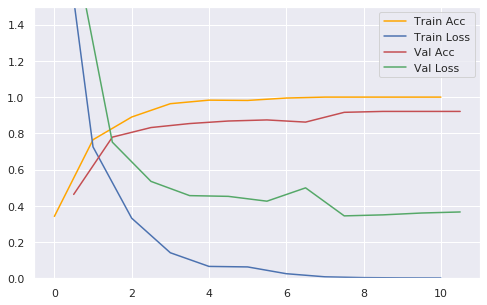

In [292]:
n_epochs=11
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,n_epochs),history.history['accuracy'], color='orange')
plt.plot(np.arange(0,n_epochs),history.history['loss'],'b')
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_loss'],'g')
plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1] 
plt.show() 

In [ ]:
# Summarise your results here:
# - include learning curves plus anything else you've used for your decisions
# - it is OK if you have also shown these results in the cell above (in fact that is normal)
#    just show the results again here, but next to each other so they are easy to compare
#    side by side

### Question 3.4

Once you have performed your systematic optimisation, choose the best network from all of your results.
- Explain why you chose this particular network.
- Were there one or more other networks with very similar performance?  
- If so, did they share particular design features (e.g. size, number of elements, etc)?

In [ ]:
# Answer question 3.4 here (no code required)

### 3.5 Show Results 
Take the best network and show the confusion matrix for its predictions.

In [ ]:
# code here and include plots that show the confusion matrix

### Question 3.6
 - What class is misclassified the most, and what class is it most typically misclassified as?
 - Give the class numbers and show example images of these.

In [ ]:
# code here needed to investigate question 3.6

In [ ]:
# Answer question 3.6 here (text answer to questions - separate from the code above)

### Question 3.7
 - Summarise (in about 2-3 sentences) what you found out about the tuning and model comparisons that you have done in this section.
 - What aspects (if any) do you think might need to be modified for other problems (e.g. those with much larger datasets)? 

In [ ]:
# Answer question 3.7 here (no code required)

***

## 4. Free Choice Element (10%)

In this section you can choose to investigate **just one** of the following options for improving the classification performance. Make sure that you explain your process and show appropriate results. Again, the final results are not that important - it is the process that counts.

Options are:
 - Implement new layers such as Dropout and BatchNormalization (see chapter 11 of Géron)
 - Try alternative and deeper CNN layouts, varying the number of Conv2D and MaxPooling layers and their ordering
 - Investigate the effects of larger networks, as well as changing at least one of the following: optimiser, activation function, batch size and/or training set size
 - Create an Ensemble of different networks and investigate the performance
 - Explore a different style of deep learning network (e.g. ResNet - see chapter 14 of Géron)
 
Report your findings and show the final results.

In [ ]:
# code here

***